# Курс "Методы современной прикладной статистики"
# 3 курс ФПМИ МФТИ, весна 2022
## Домашнее задание 1. Оценки и доверительные интервалы

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
import pandas as pd
sns.set(style='darkgrid', font_scale=1.4)
%matplotlib inline
%config InlineBackend.figure_format="retina"  # only for retina display

In [17]:
import warnings
warnings.filterwarnings('ignore')

### Условие

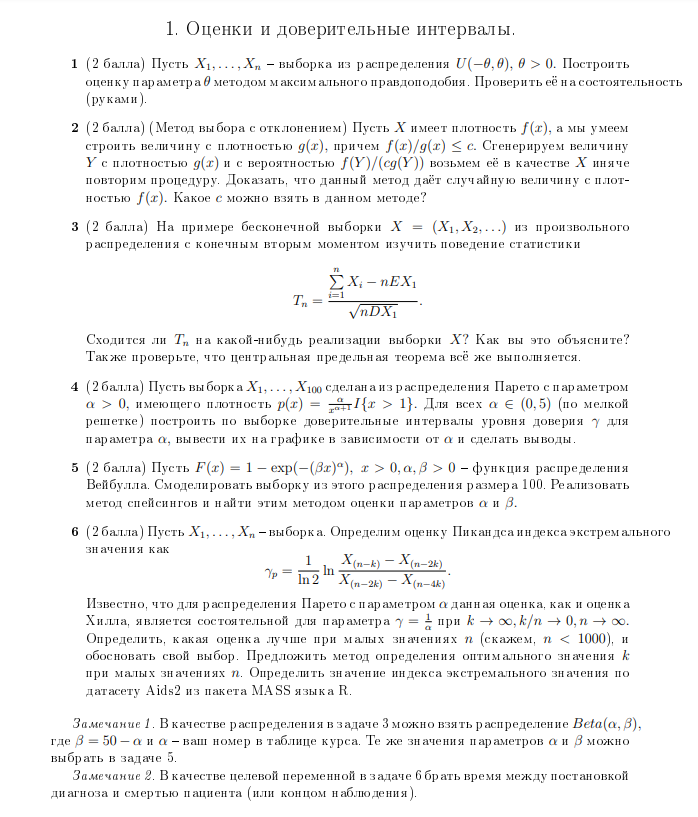

### Задача 1

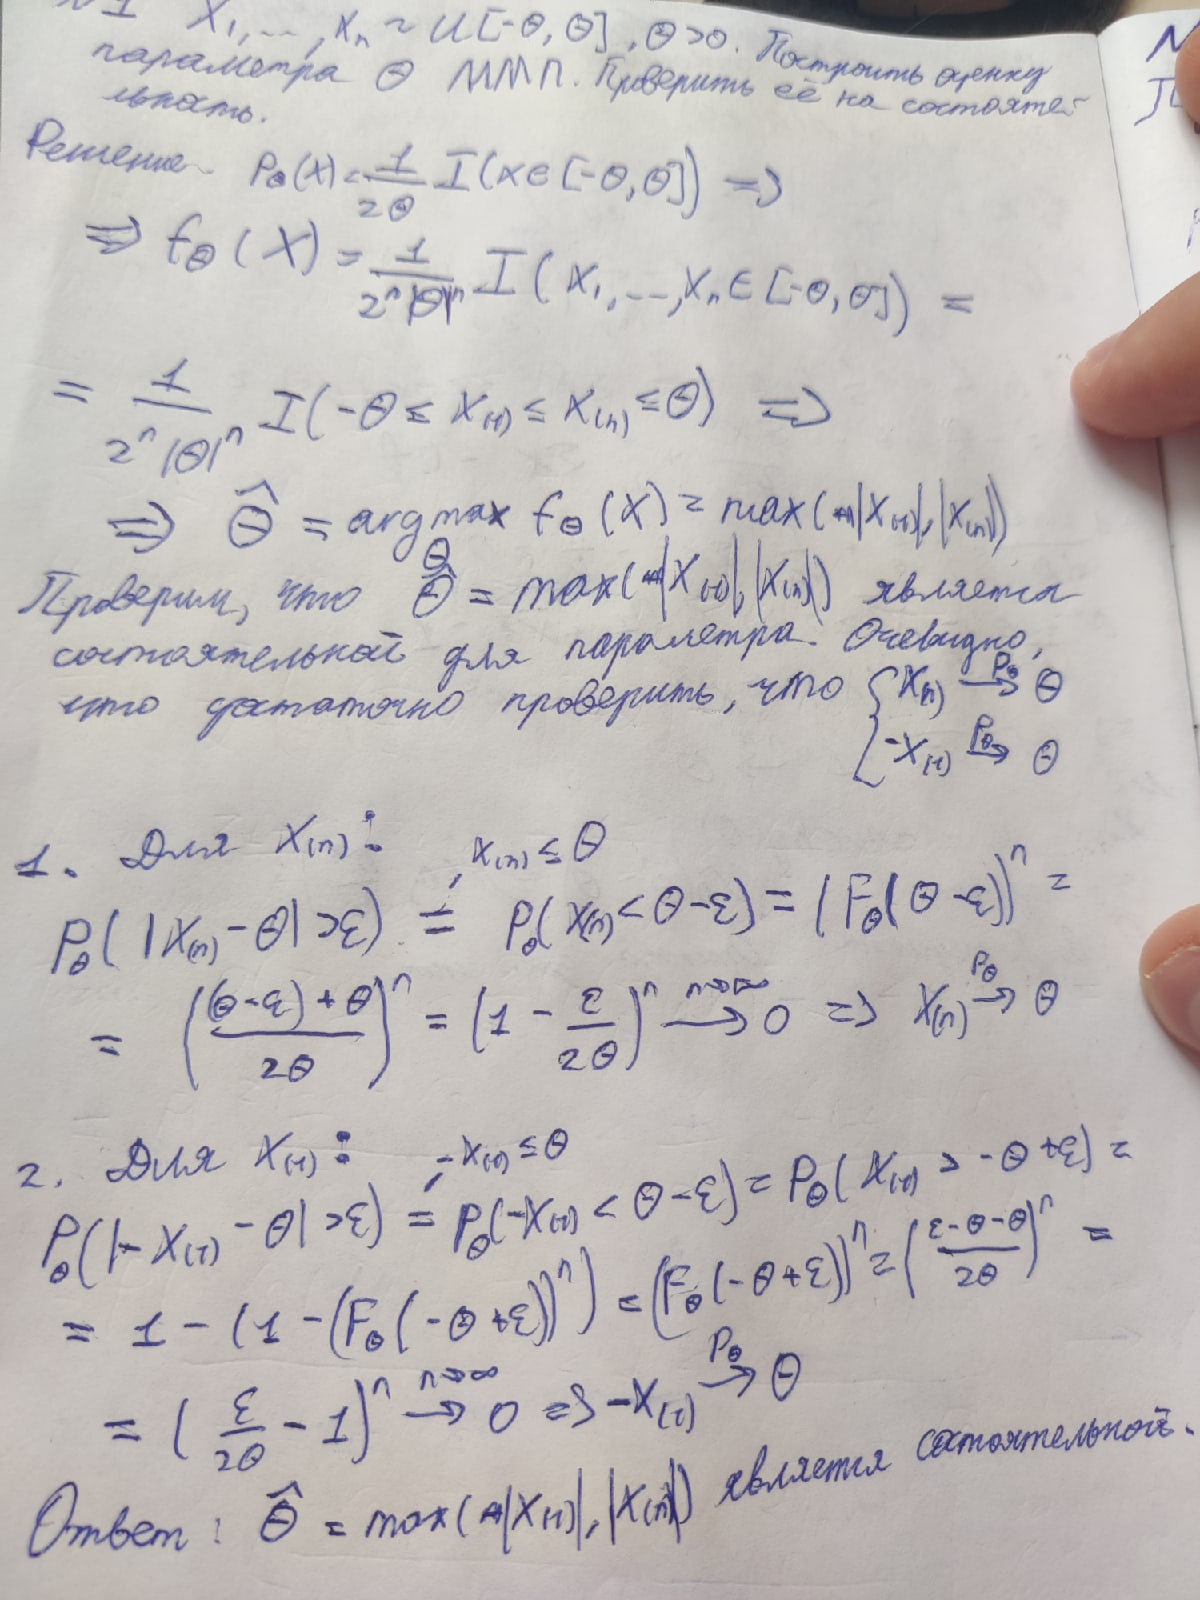

### Задача 2

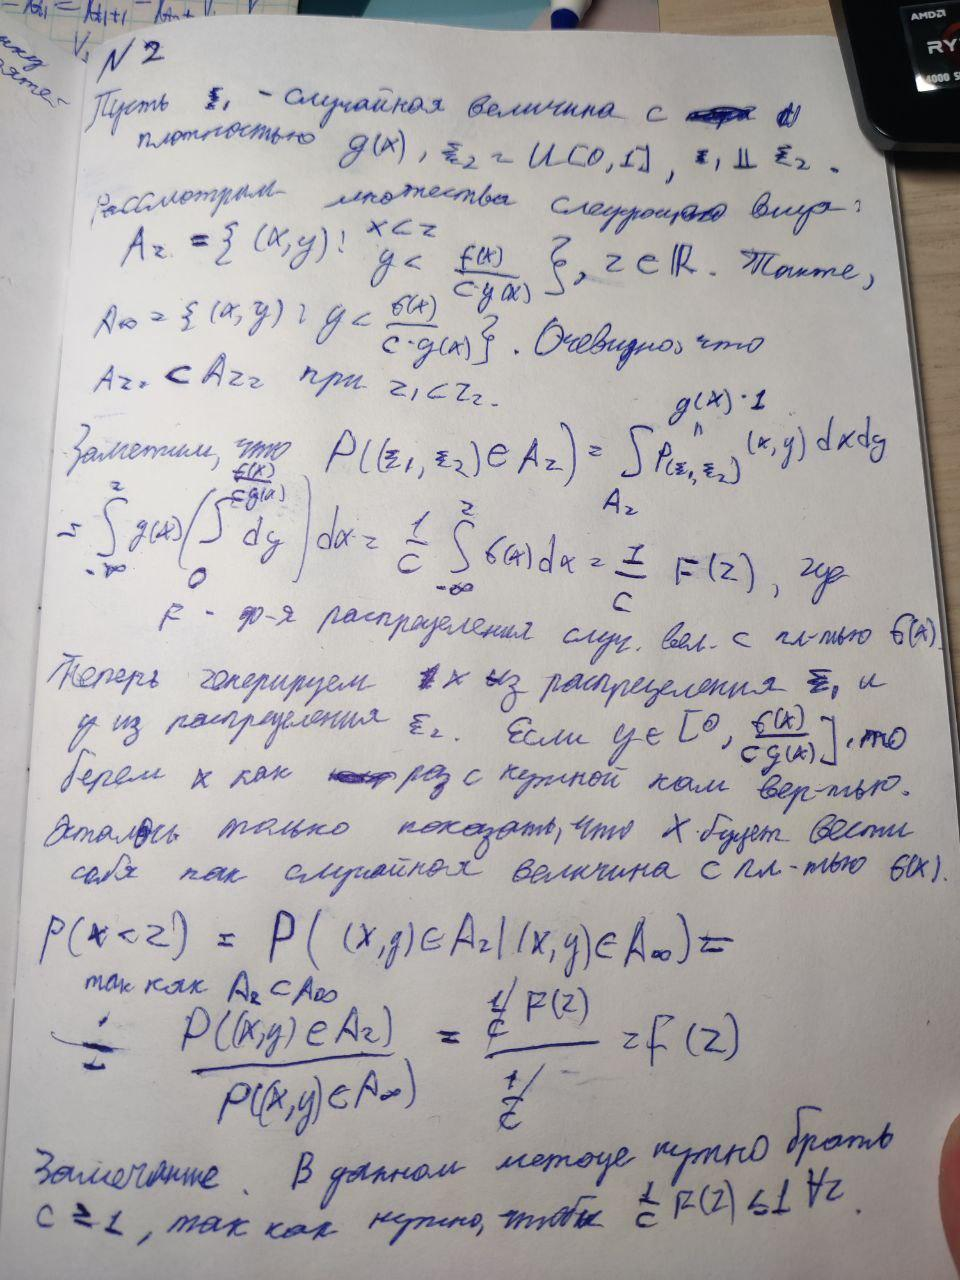

### Задача 3

In [121]:
def get_Tn(sample, mean, var):
    return (sample.cumsum() - np.arange(1, len(sample) + 1) * mean) / (np.sqrt(n * var))

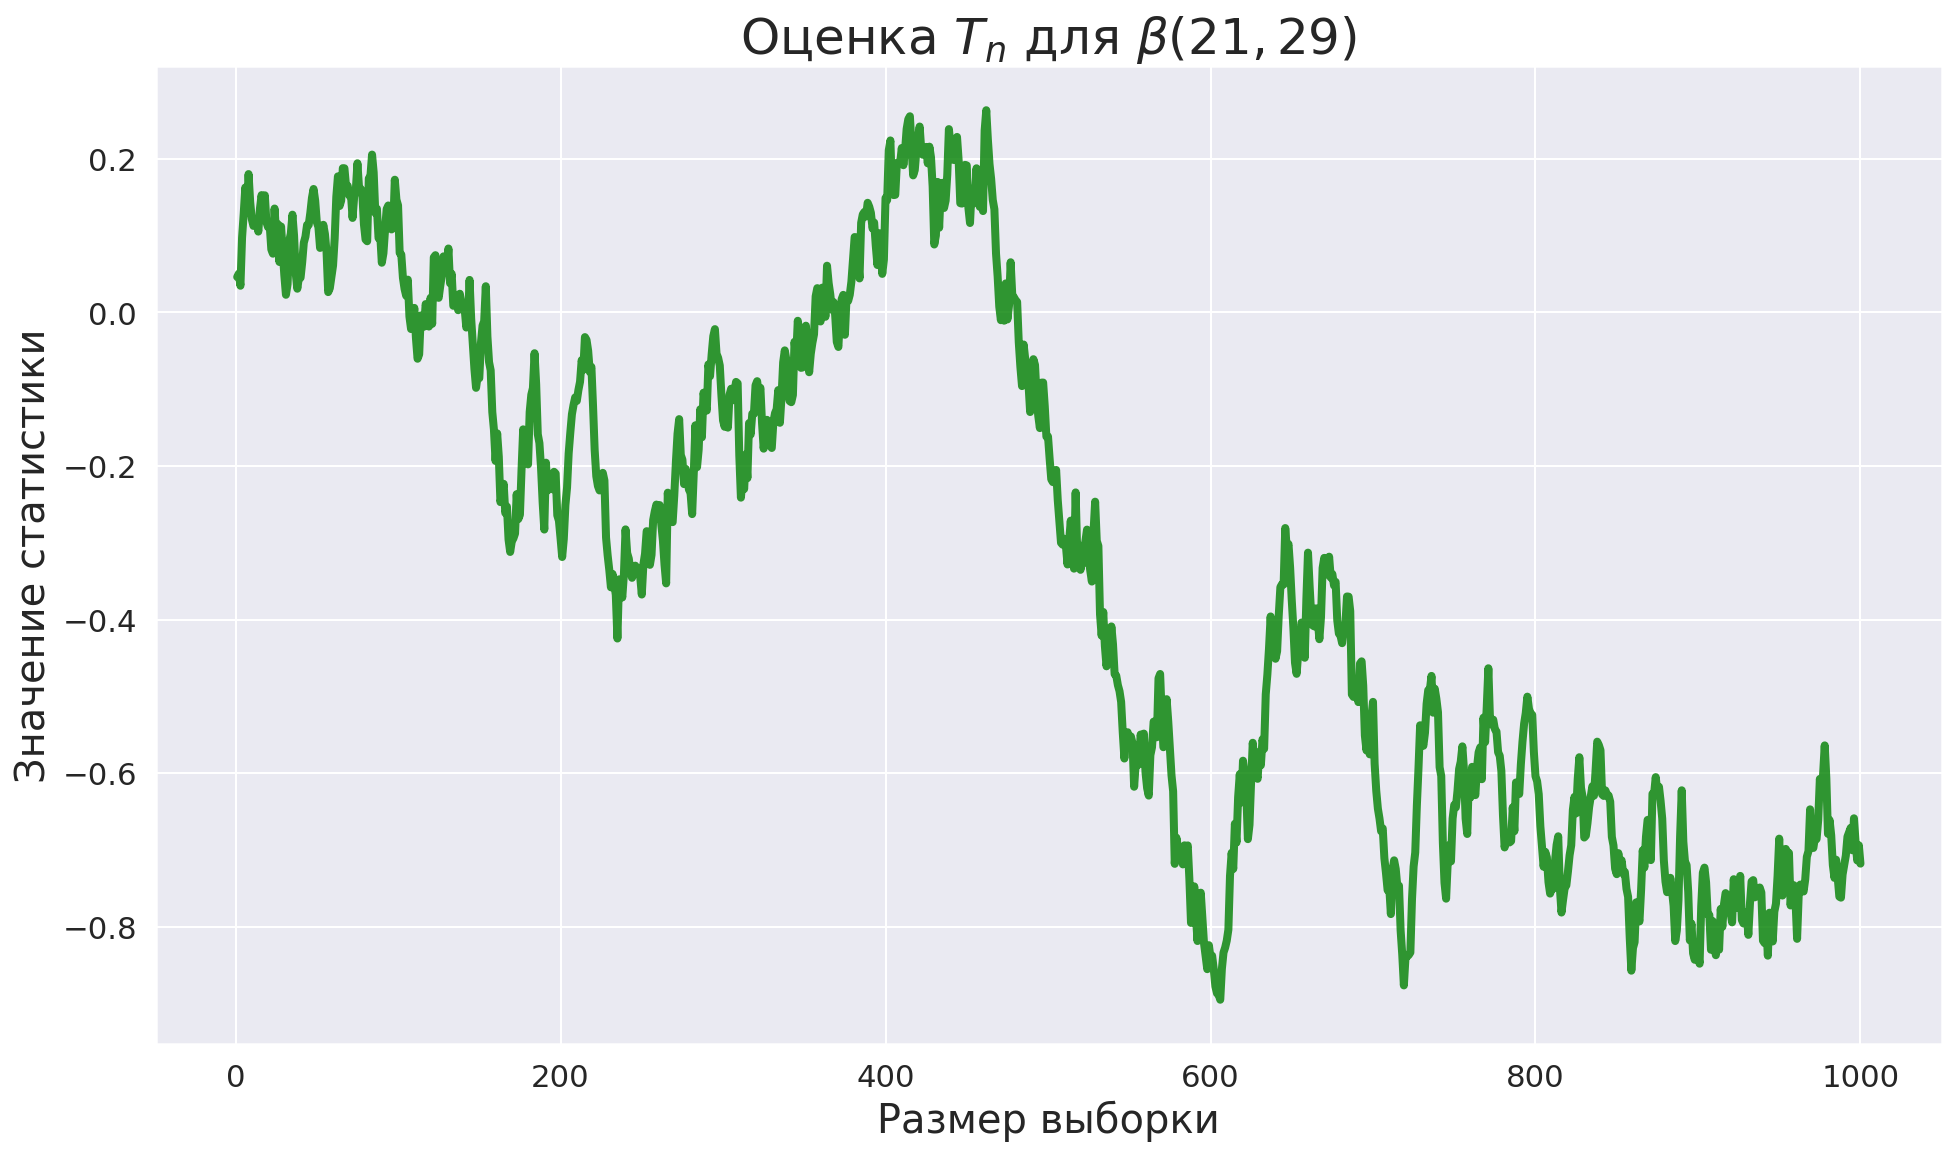

In [122]:
n = 1000
a, b = 21, 50 - 21
sample, mean, var = sps.beta.rvs(a, b, size = n),  sps.beta.mean(a, b),  sps.beta.var(a, b)
Tn_vals = get_Tn(sample, mean, var)
plt.figure(figsize = (16, 9))
plt.plot(np.arange(1, n + 1), Tn_vals, color = 'green', alpha = 0.8, linewidth = 4)
plt.title(fr'Оценка $T_n$ для $\beta(21, 29)$', fontsize=25)
plt.xlabel('Размер выборки', fontsize=20)
plt.ylabel('Значение статистики', fontsize=20)
plt.show()

**Замечания:**
1. $T_n$ точно будет сходиться на какой-то реализации выборки $X$, так как очевидно, что существует реализация $x = X_1(w) = X_2(w) = X_3(w)=...$. 
2. Центральная предельная теорема будет выполняться для любого распределения с конечным вторым моментом, так как из существования конечного второго момента следует существование конечного первого момента (то есть математического ожидания), а значит существует и конечная дисперсия. 

### Задача 4

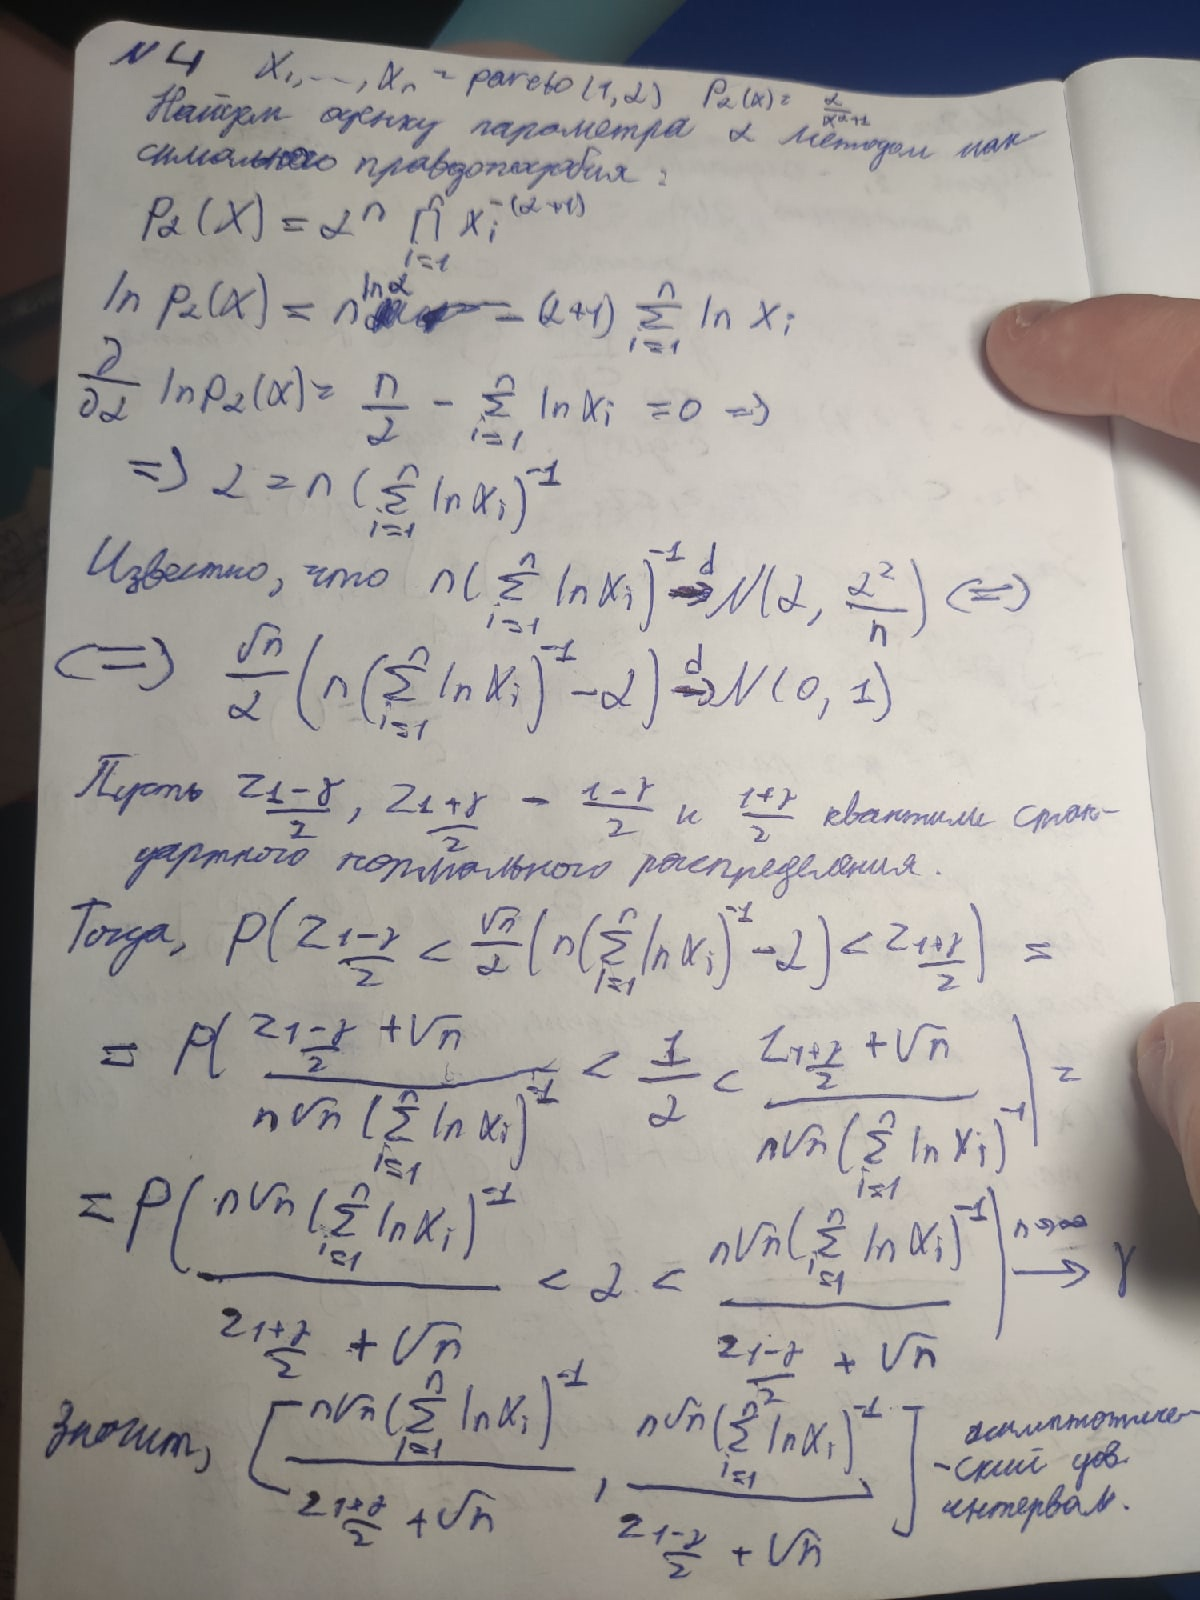

**Замечание:** Ссылка на работу, где сказано, что оценка методом максимального правдоподобия по распределению стремится к некоторой случайной величине -- https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.429.3440&rep=rep1&type=pdf 

In [2]:
def find_mle(sample):
    return len(sample) / np.log(sample).sum()

In [6]:
bottom = []
upper = []
mle_vals = []
def calc_interval(alpha, n, gamma):
    sample = sps.pareto.rvs(alpha, size = n)
    mle = find_mle(sample)
    mle_vals.append(mle)
    bottom.append((n * np.sqrt(n) * np.power(np.log(sample).sum(), -1)) 
                  / (sps.norm.ppf((1 + gamma) / 2) + np.sqrt(n)))
    upper.append((n * np.sqrt(n) * np.power(np.log(sample).sum(), -1))
                 / (sps.norm.ppf((1 - gamma) / 2) + np.sqrt(n)))

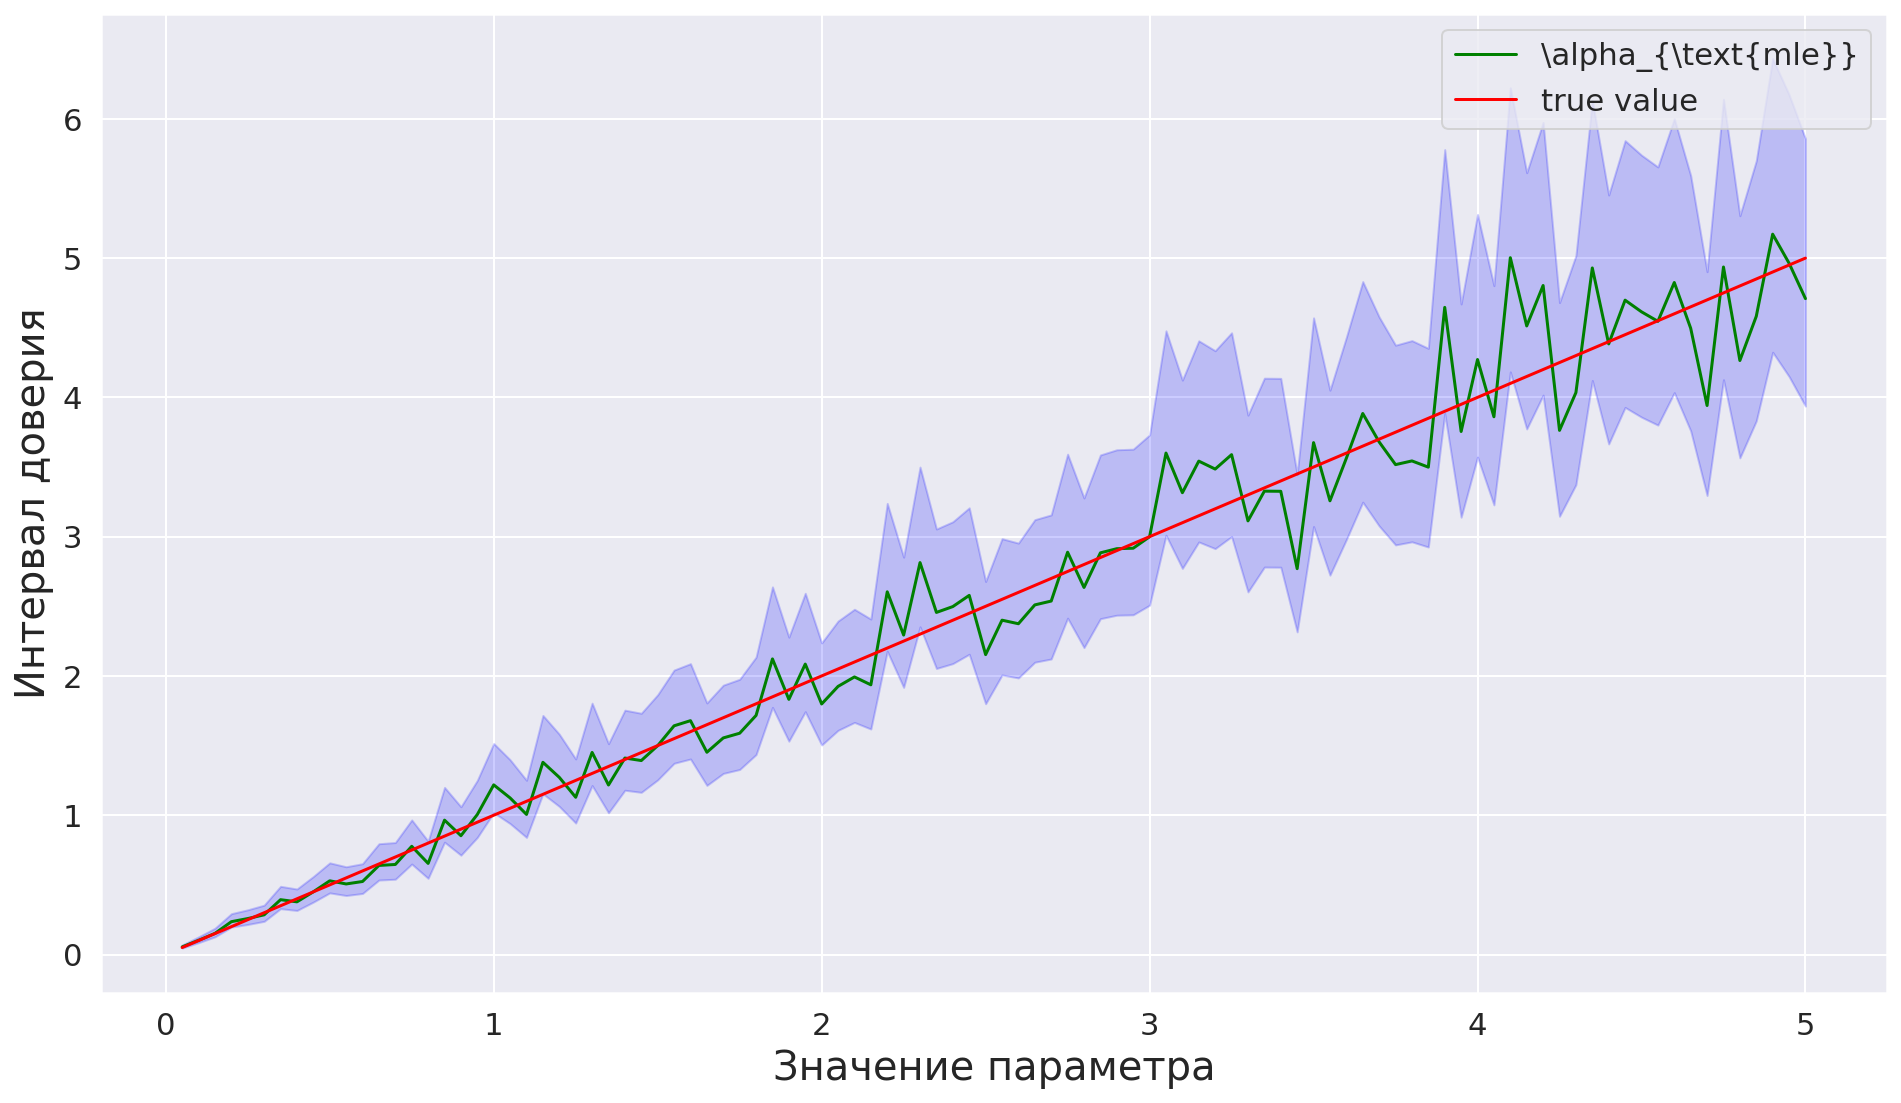

In [7]:
n = 100
gamma = 0.95
grid = np.linspace(0.05, 5, 100)

for alpha in grid:
    calc_interval(alpha, n, gamma)
plt.figure(figsize = (16, 9))
plt.fill_between(grid, bottom, upper, alpha = 0.2, color = 'blue')
plt.plot(grid, mle_vals, color = 'green',  label = r'\alpha_{\text{mle}}')
plt.plot(grid, grid, color = 'red', label = 'true value')
plt.xlabel('Значение параметра', fontsize=20)
plt.ylabel('Интервал доверия', fontsize=20)
plt.legend()
plt.show()

### Задача 5

Данного распределения не было найдено в библиотеке scipy, поэтому пришлось сгенерировать выборку из него самому, используя метод обратной функции. Напомним этот способ:
$$ F_\xi(\xi) \sim U[0, 1] $$

Тогда случайную величину можно получив, подставив равномерно распределенную случайную величину в обратную функцию распределения:

$$ \xi \sim F^{-1}_{\xi}(U[0, 1]) $$

In [136]:
from scipy.optimize import minimize

In [137]:
def func(x, a, b):
    return 1 - np.exp(-np.power((b * x), a))

In [138]:
def invert_func(x, a, b):
    return (1 / b) * np.power(-np.log(1 - x), 1 / a)

In [139]:
n = 100
a ,b = 21 ,29
sample = invert_func(np.random.rand(n), a, b)
sample = sorted(sample)
sample = np.append(sample, np.inf)
sample = np.insert(sample, 0, 0)

In [140]:
def func_to_minimize(x):
    global sample
    return -np.sum(np.log(np.diff(func(sample, x[0], x[1]))))

In [141]:
res = minimize(func_to_minimize, [23, 31])
print(res.x, res.fun)

[21.2802762  28.91503005] 514.8207625662967


**Вывод:** Метод спейсингов дал нам неплохой результат.

### Задача 6

Напомним, что оценкой Хилла индекса экстремального значения $y_k = \frac{1}{k} \cdot \sum_{i = 0}^{k - 1}{ln(X_{(n - i)}) - ln(X_{(n - k)}))}$.

Оценка Пикандса индекса экстремального значения -- $y_k = \frac{1}{ln 2} \cdot ln \Big( \frac{X_{(n - k)} - X_{(n - 2k)}}{X_{(n - 2k)} - X_{(n - 4k)}} \Big)$

Про обе известно, что они являются состоятельными $\gamma = \frac{1}{\alpha}$ при $k, n \to \infty$, $\frac{k}{n} \to 0$, если выборка взята из распределения Парето с параметром $\alpha$.

Проверим, какая оценка лучше работает при маленьких $n$:

In [4]:
def calc_Picandas(k, sample):
    sample = sorted(sample)
    return (1 / np.log(2)) * np.log( (sample[len(sample) - 1 - k] - sample[len(sample) - 1 - 2 * k]) /
                                   (sample[len(sample) - 1 - 2 * k] - sample[len(sample) - 1 - 4 * k]))

def calc_Hill(k, sample):
    sample = sorted(sample)
    return (1 / k) * np.sum(np.log(sample[len(sample) - k:]) - np.log(sample[len(sample) - k]))

In [5]:
def draw_Hill_and_Picandas(sample, sz, alpha):
    max_k = int(sz / 4)
    
    plt.figure(figsize = (16, 9))
    est_vals = []
    for k in range(1, max_k):
        est_vals.append(calc_Picandas(k, sample))
    plt.hlines(alpha, xmin = 1, xmax = max_k, color = 'red', label = 'parameter value')
    plt.scatter(np.arange(1, max_k), 1 / np.array(est_vals), label = 'index values')
    plt.ylim(-5, 10)
    plt.title(f"Invert Picandas index for sample size = {sz}")
    plt.xlabel("k")
    plt.legend()
    plt.show()
    
    plt.figure(figsize = (16, 9))
    est_vals = []
    for k in range(1, max_k):
        est_vals.append(calc_Hill(k, sample))
    plt.hlines(alpha, xmin = 1, xmax = max_k, color = 'red', label = 'parameter value')
    plt.scatter(np.arange(1, max_k), 1 / np.array(est_vals), label = 'index values')
    plt.ylim(-2, 6)
    plt.title(f"Invert Hill index for sample size = {sz}")
    plt.xlabel("k")
    plt.legend()
    plt.show()

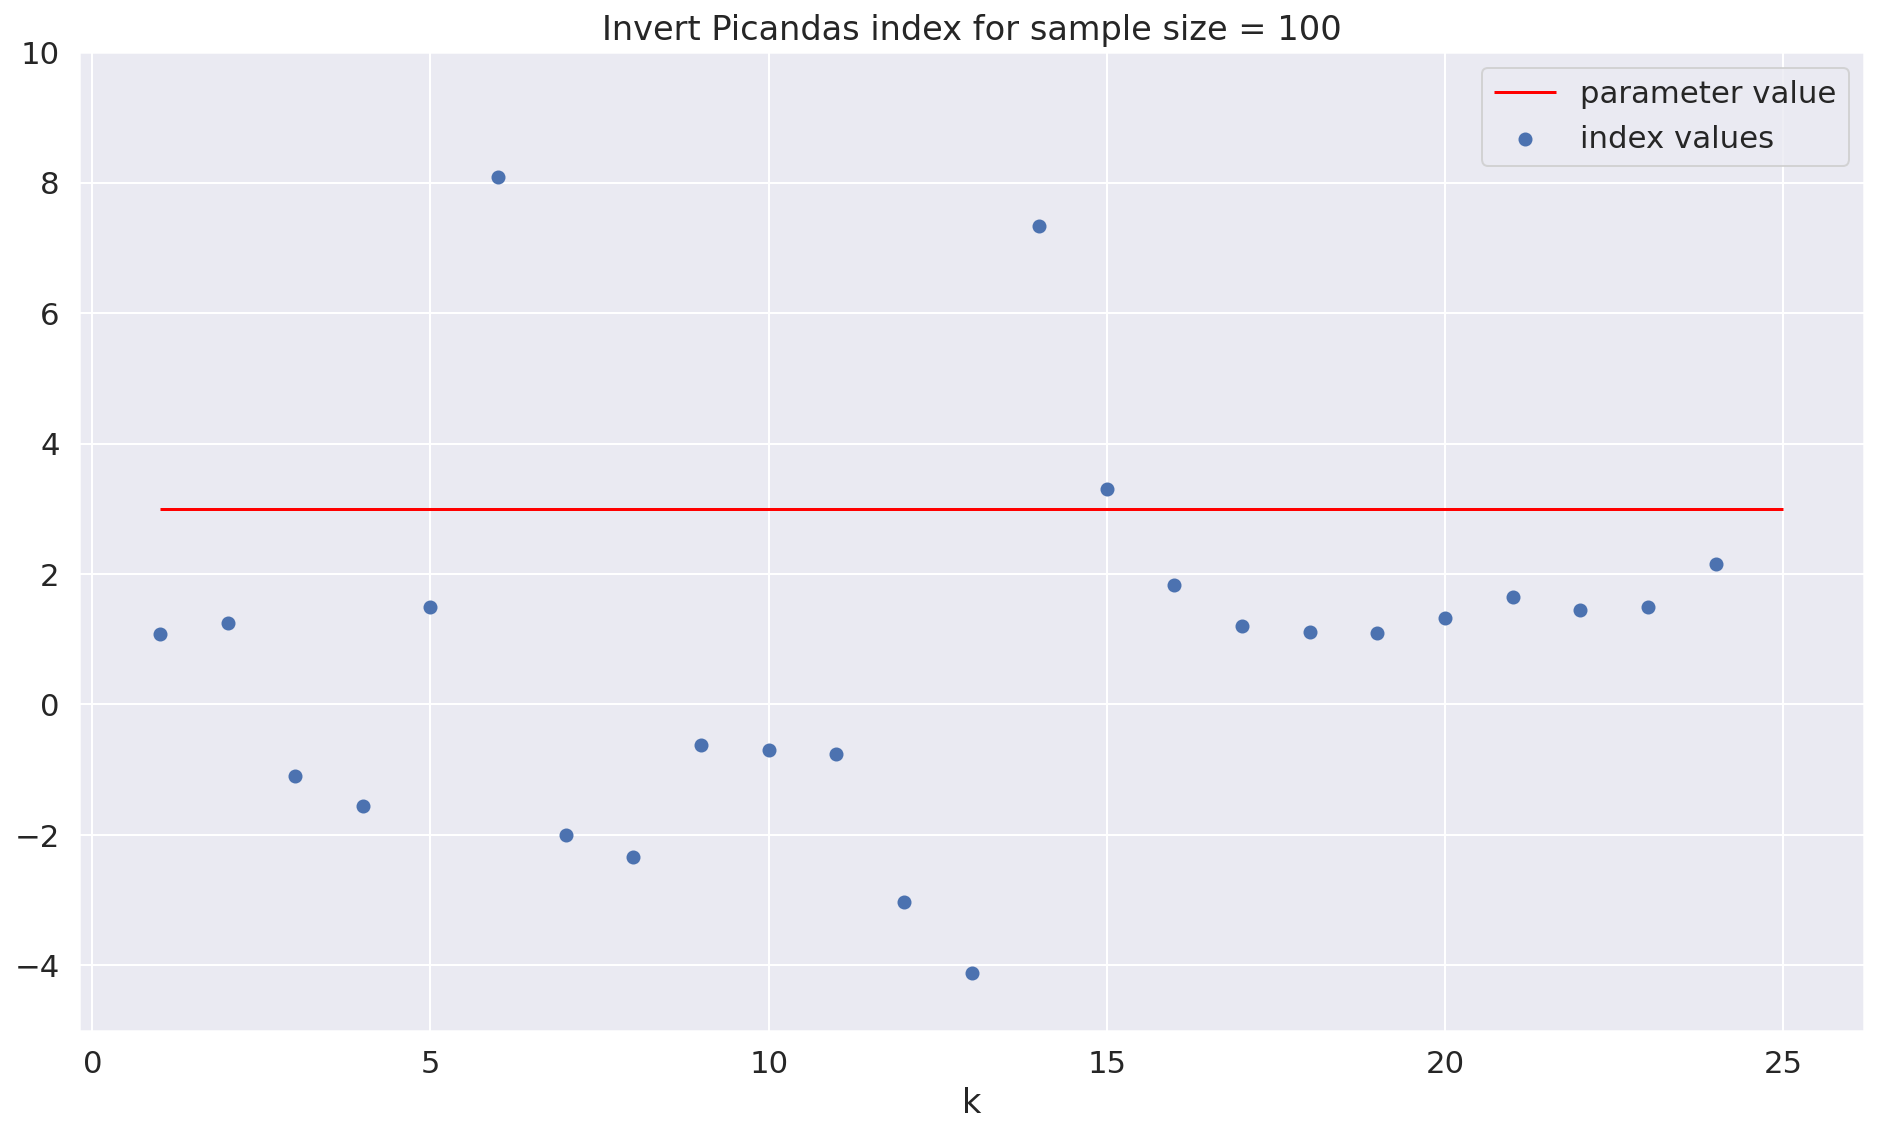

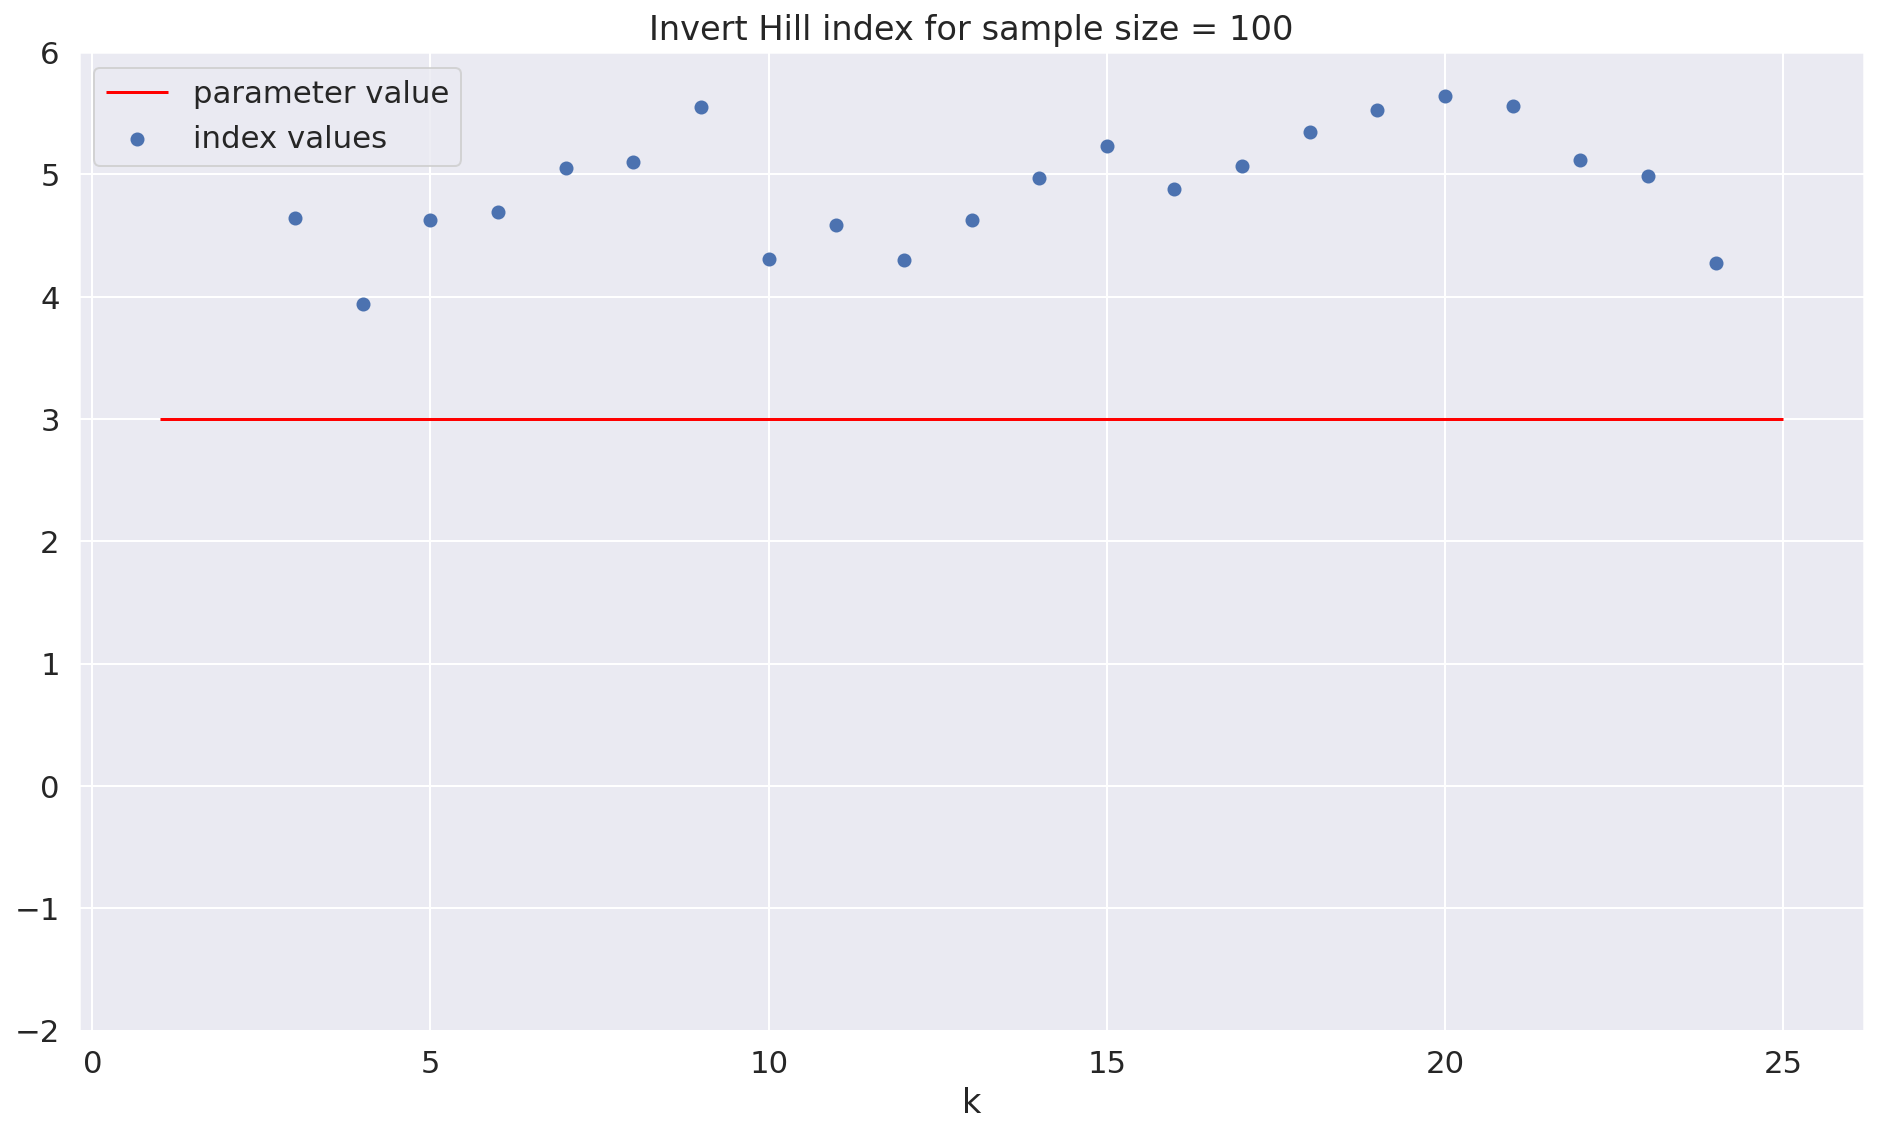

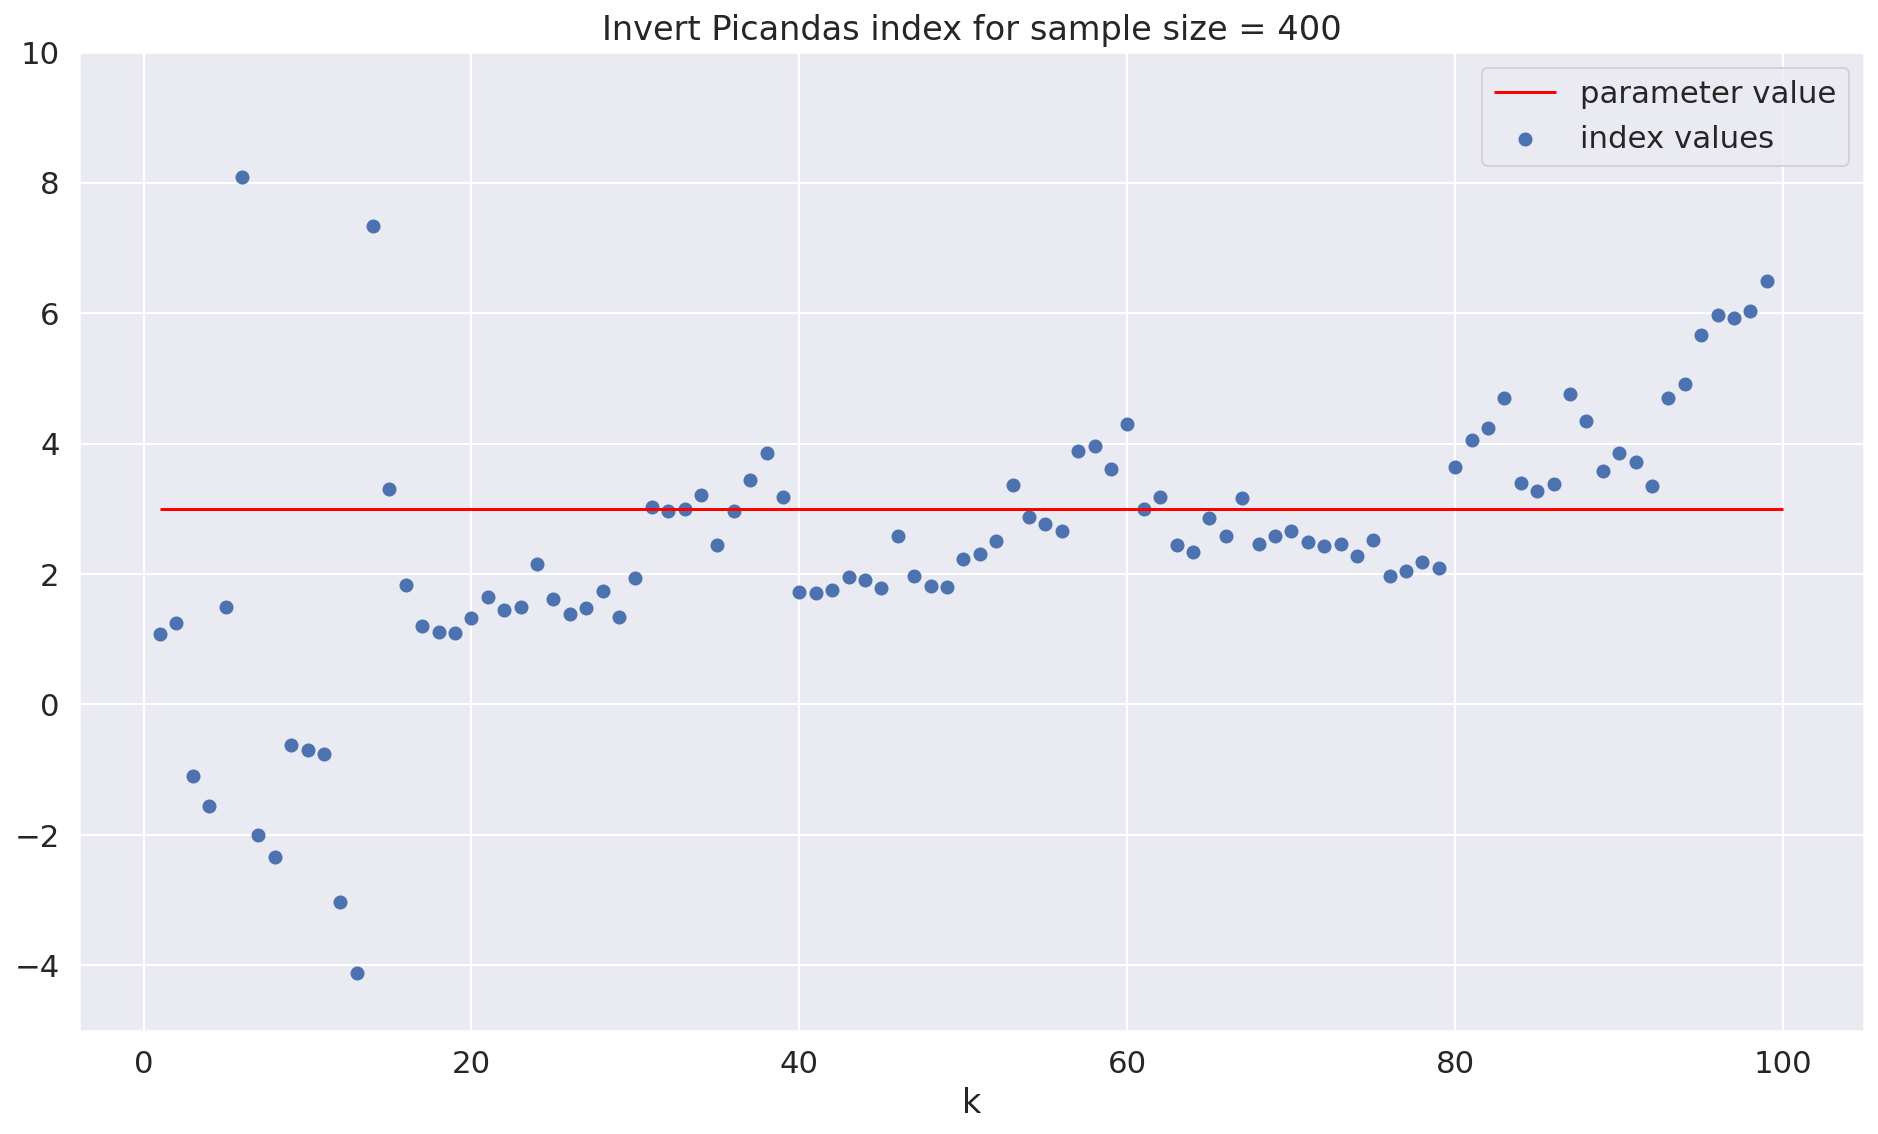

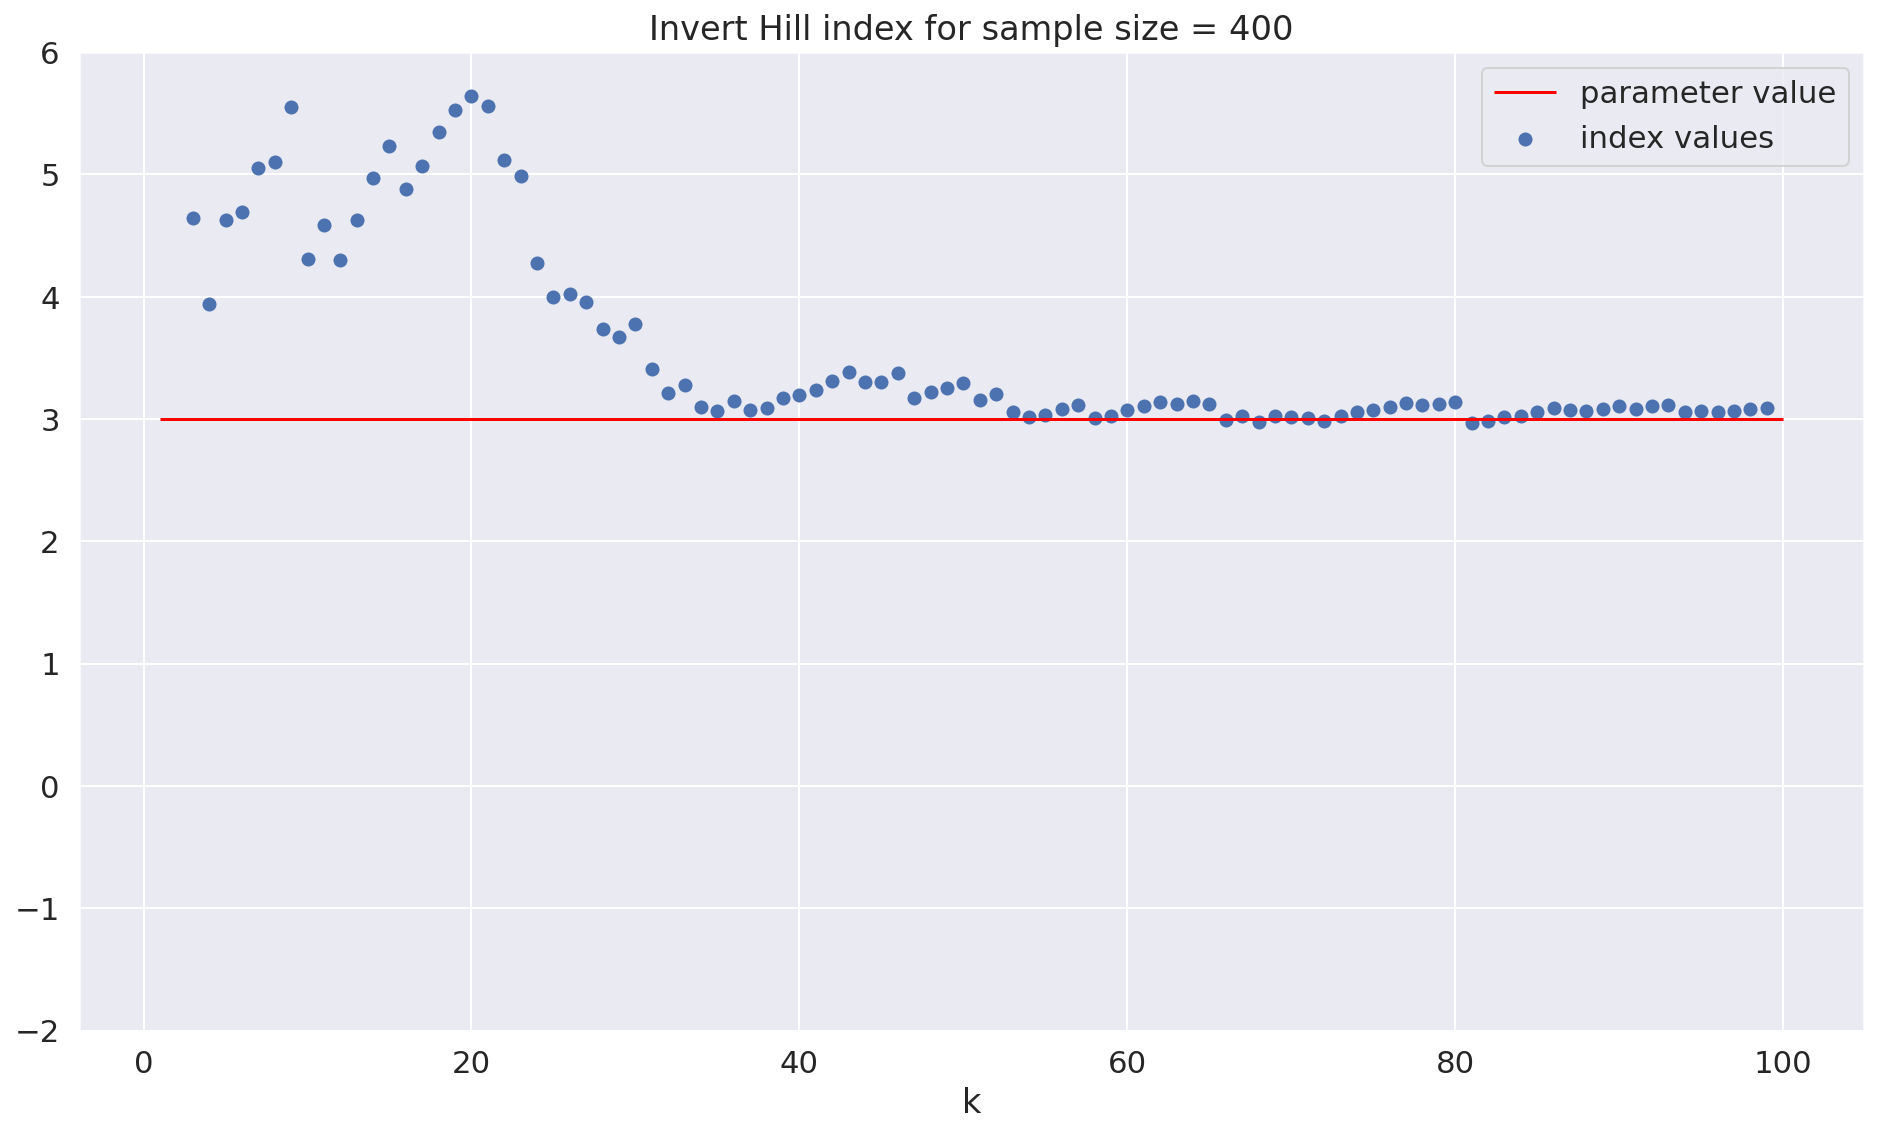

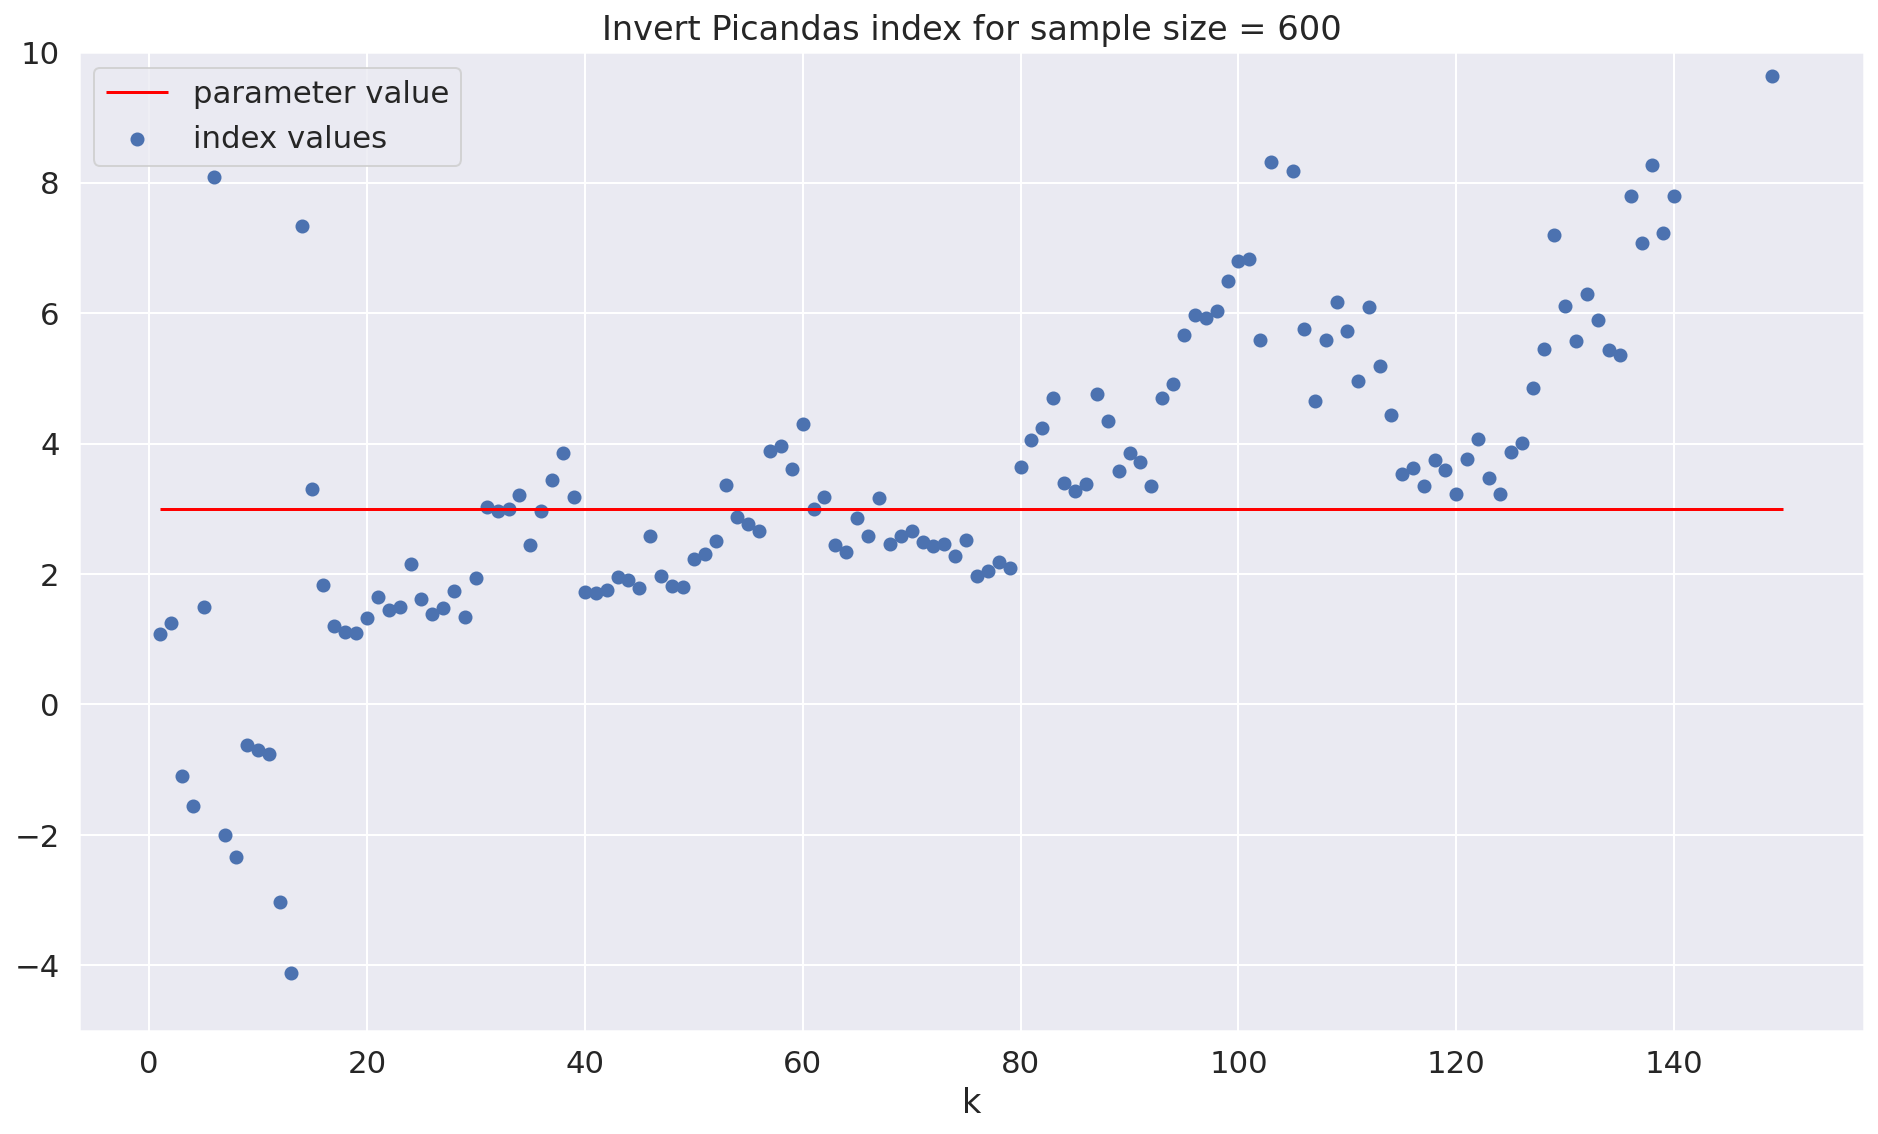

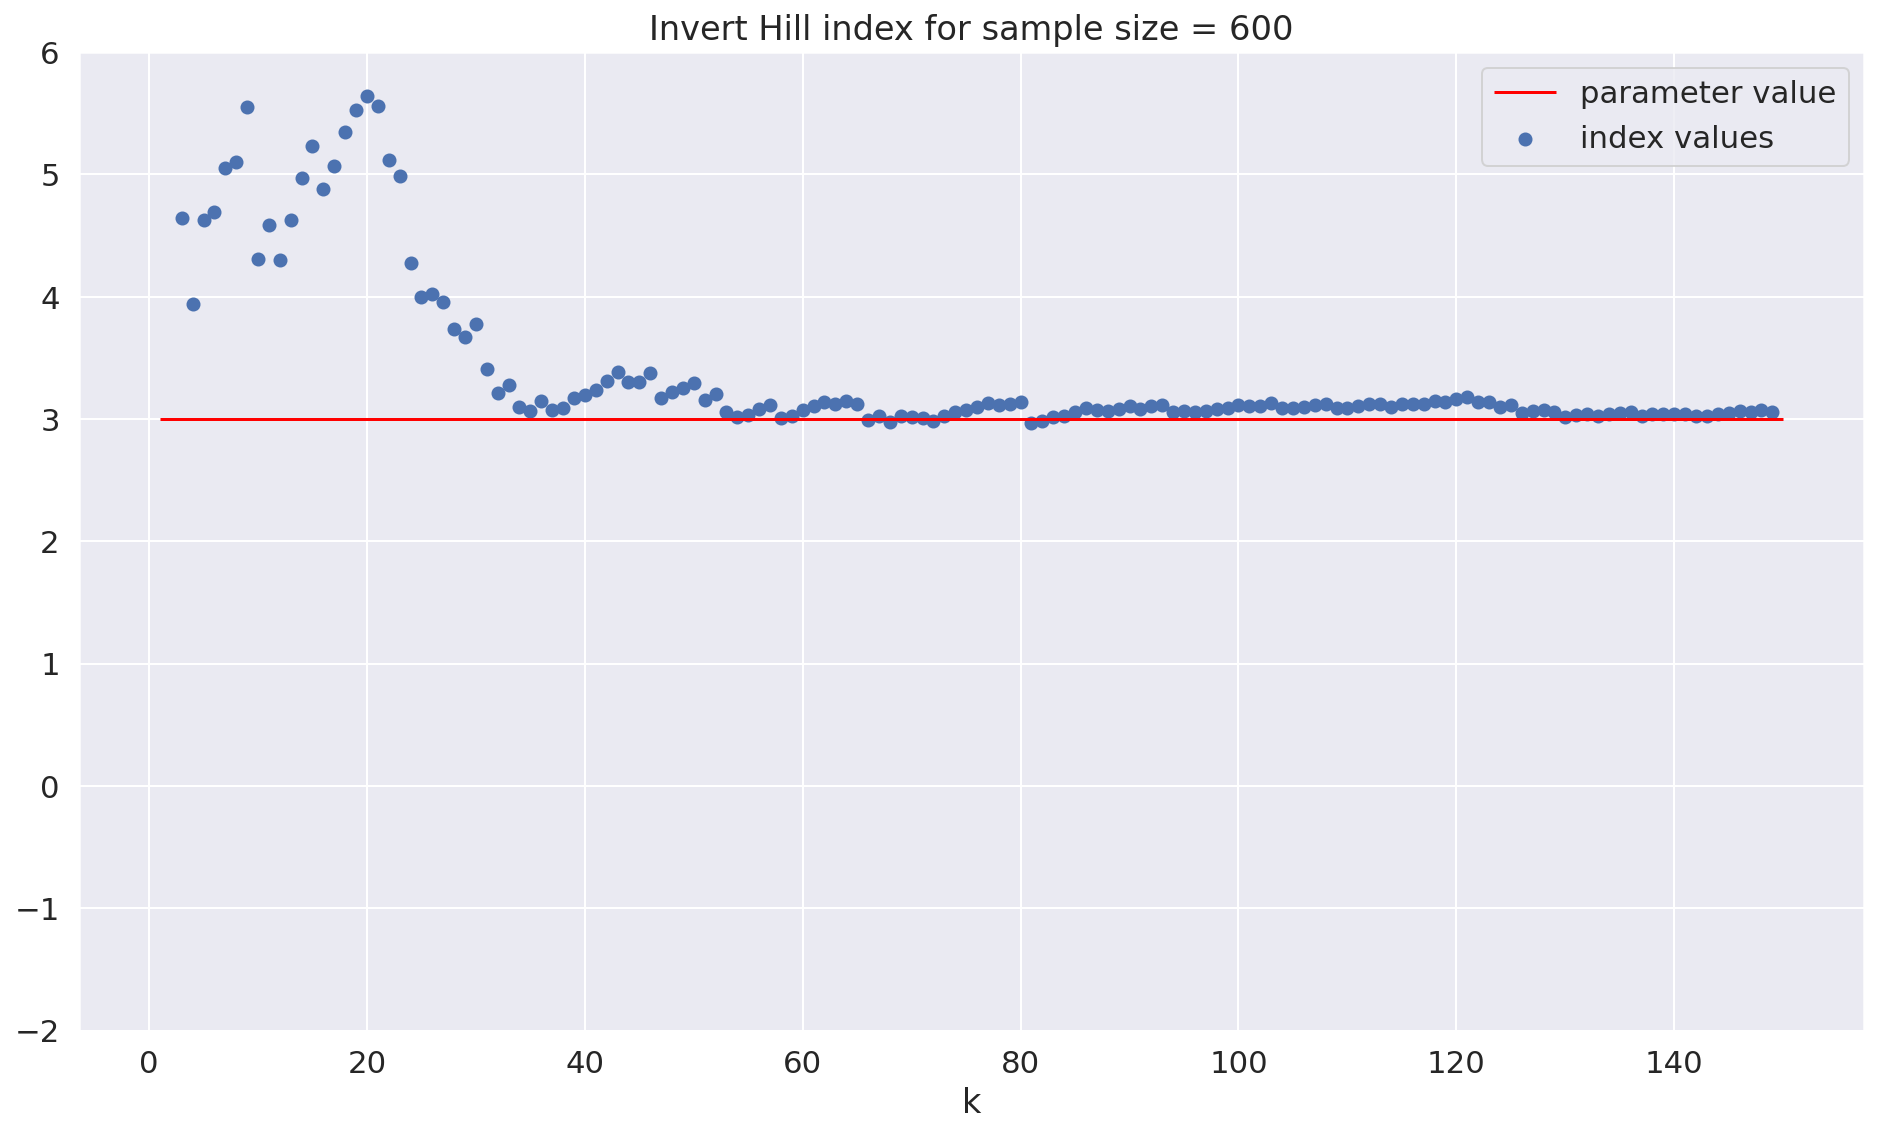

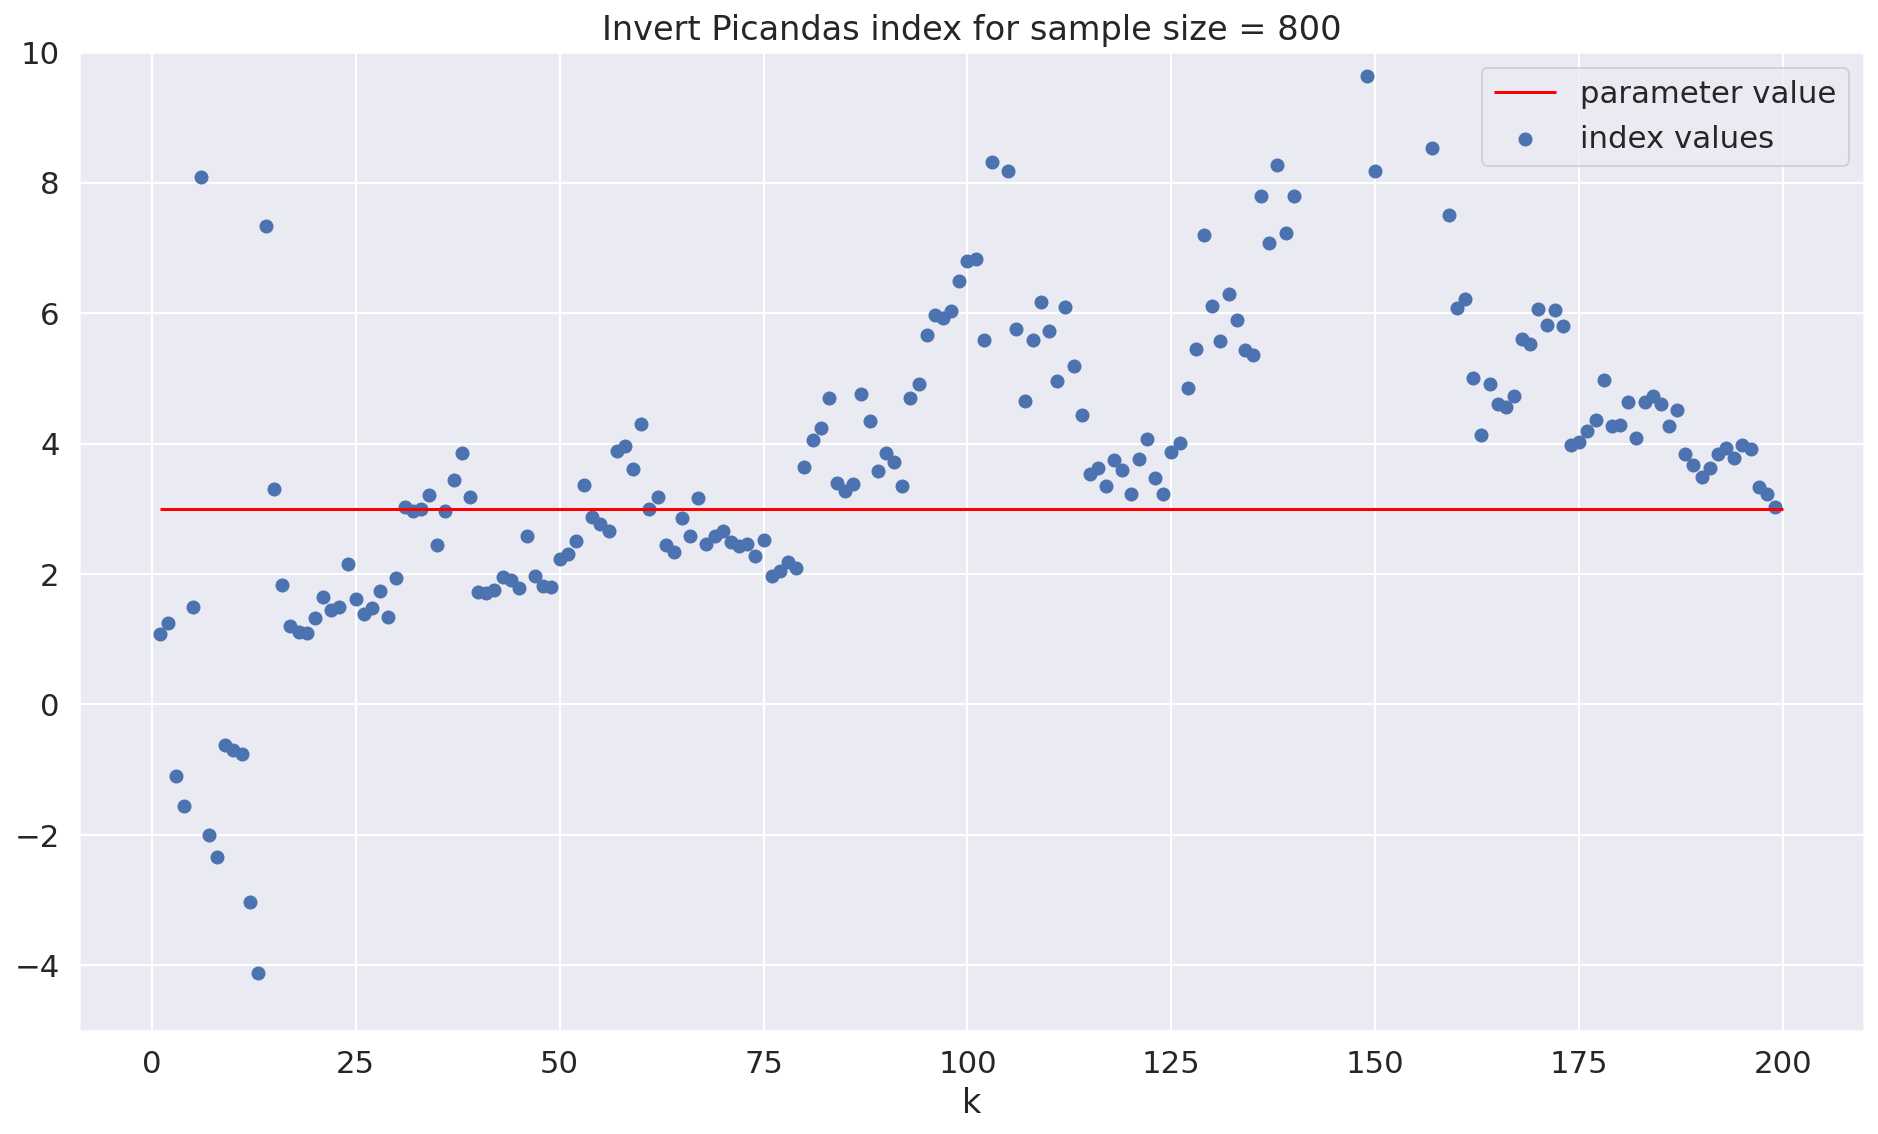

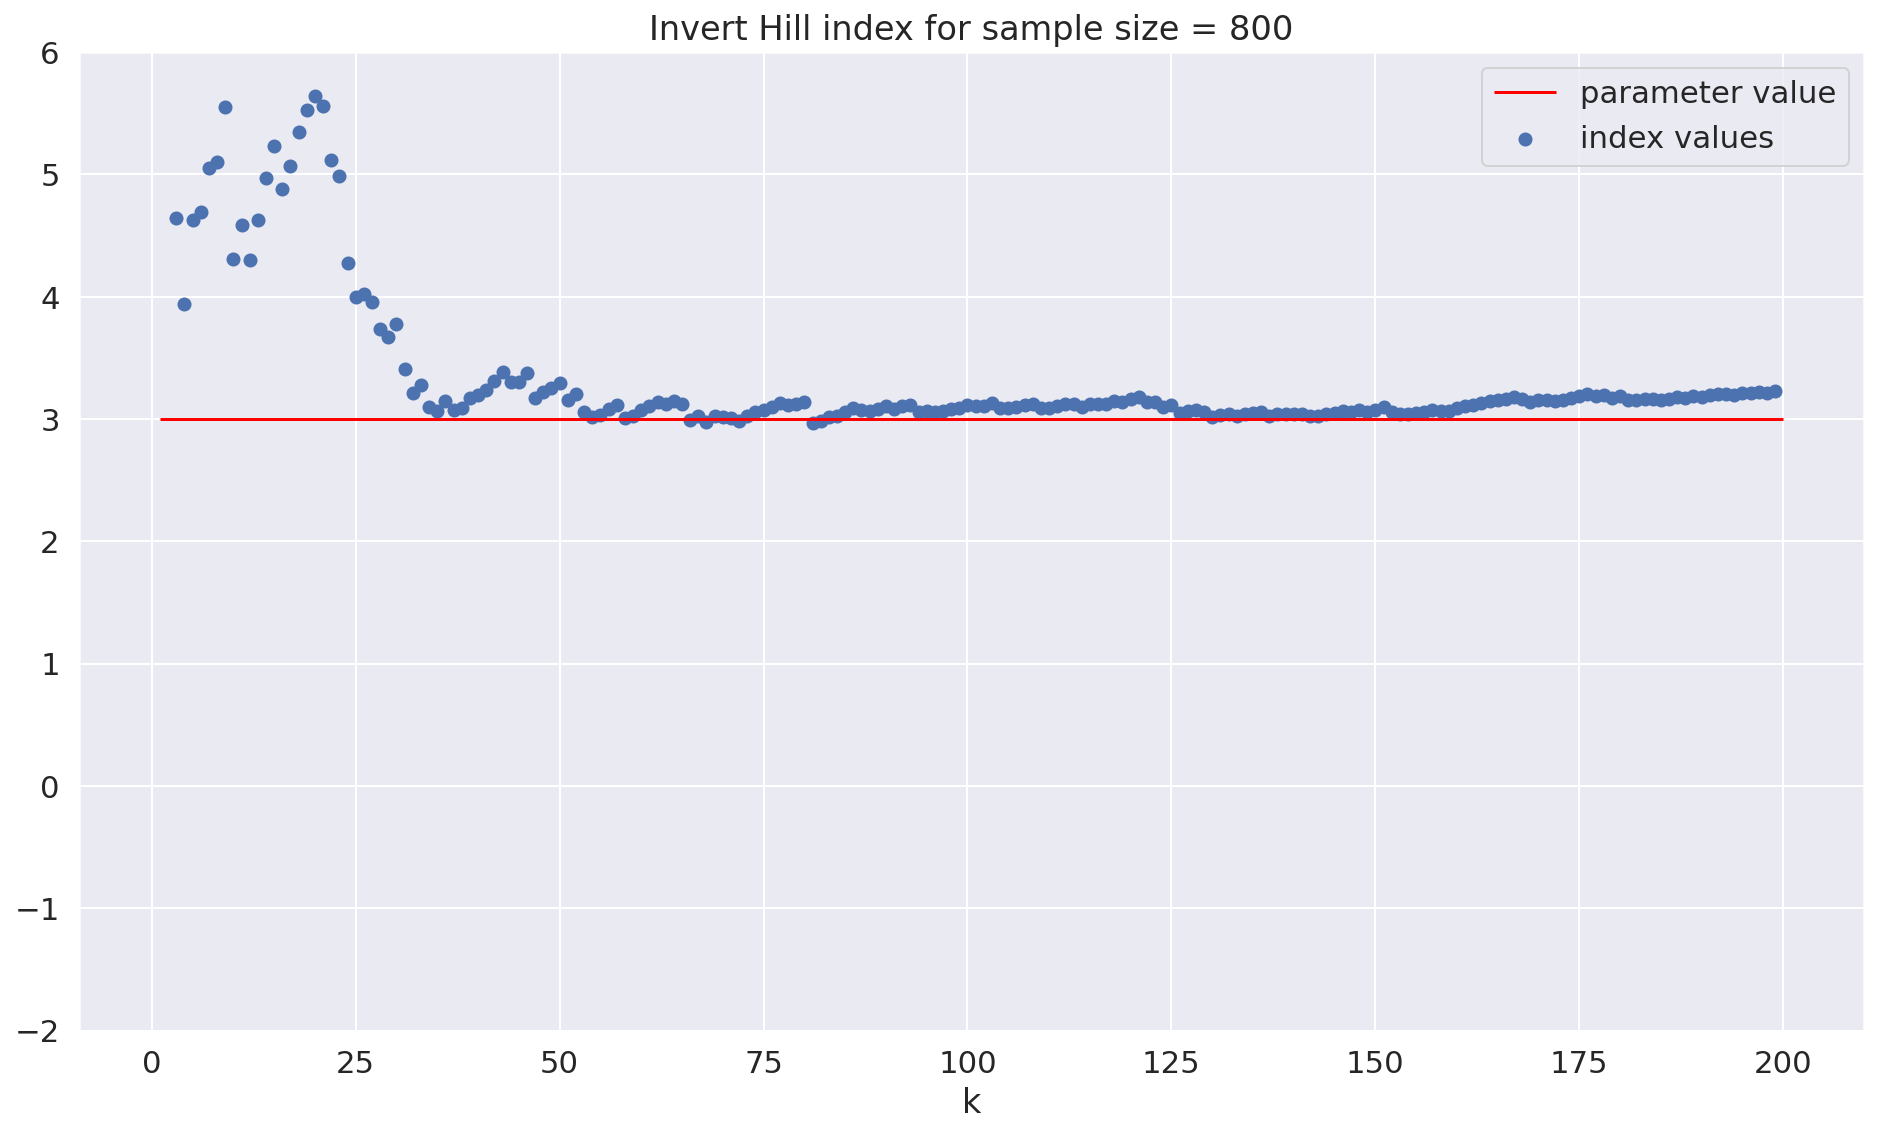

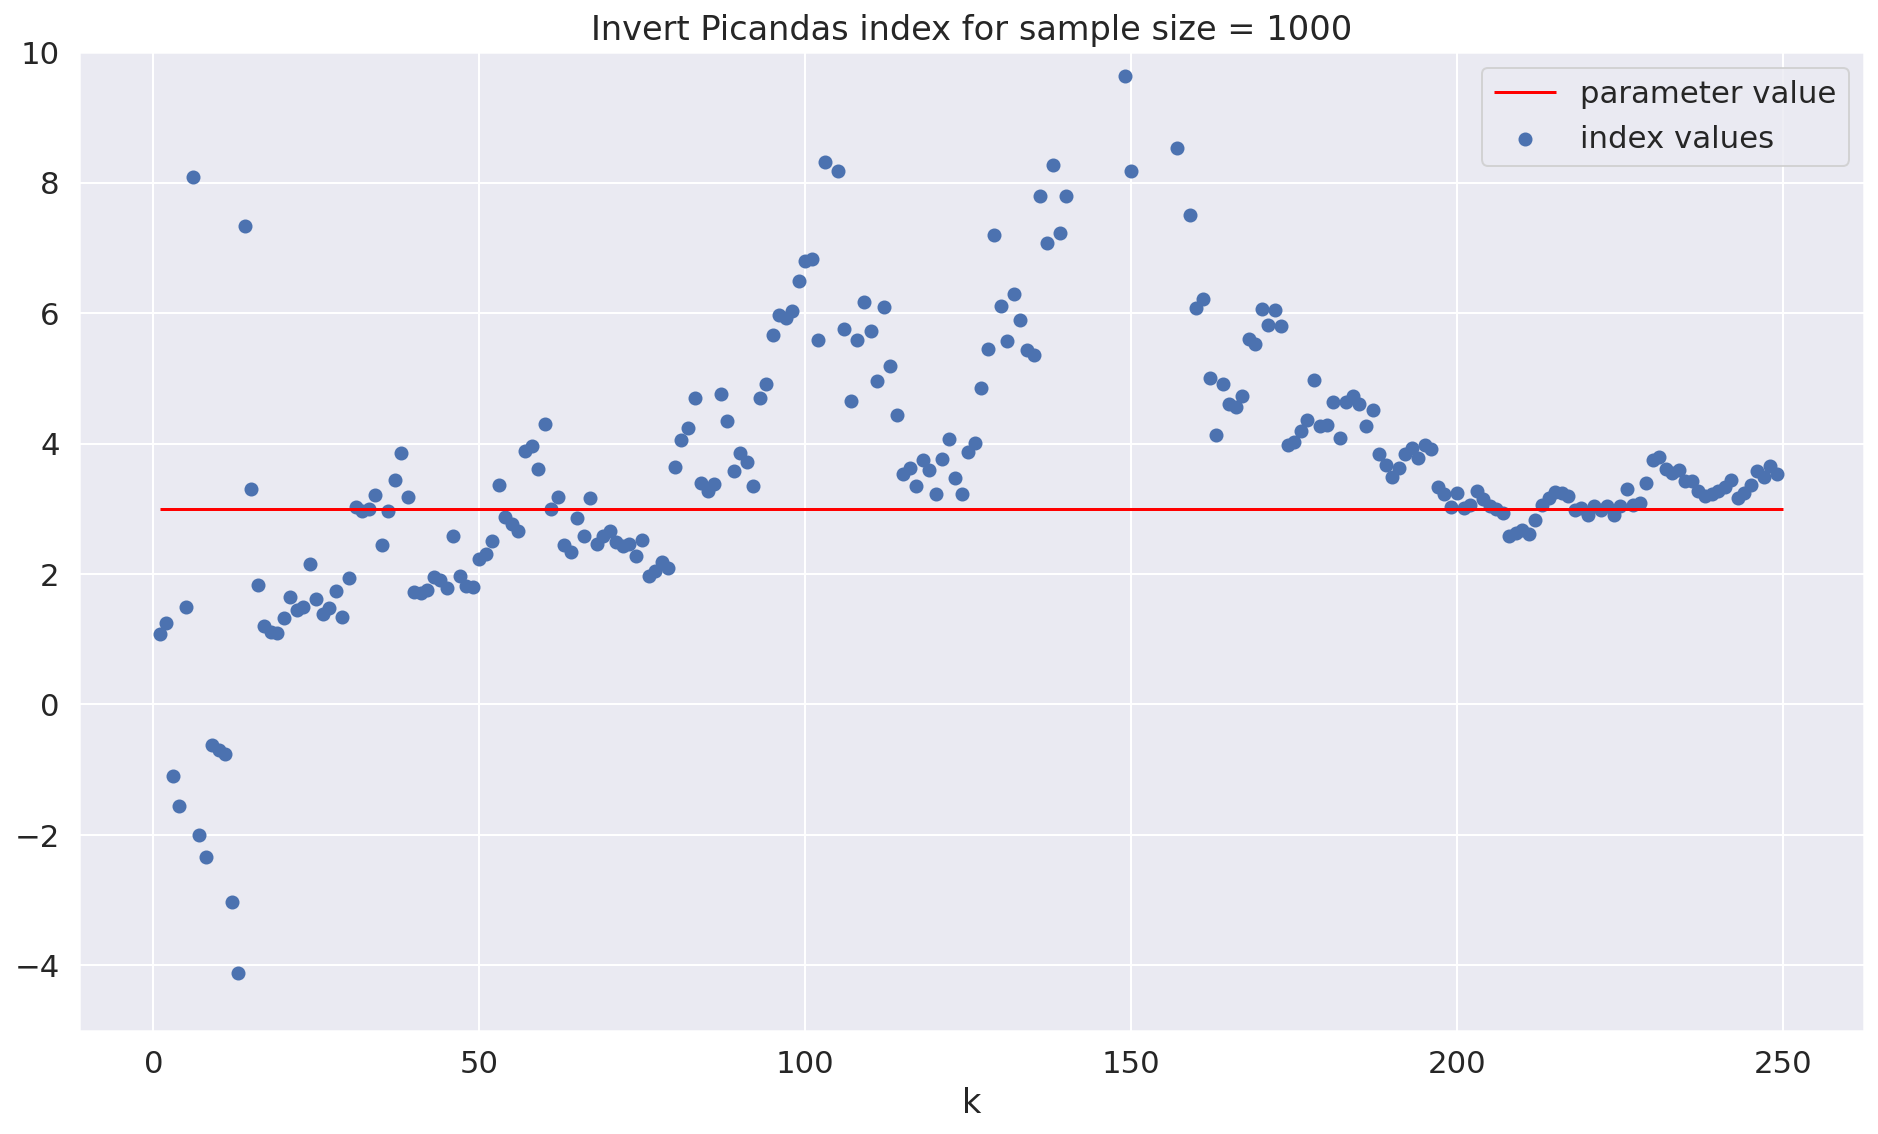

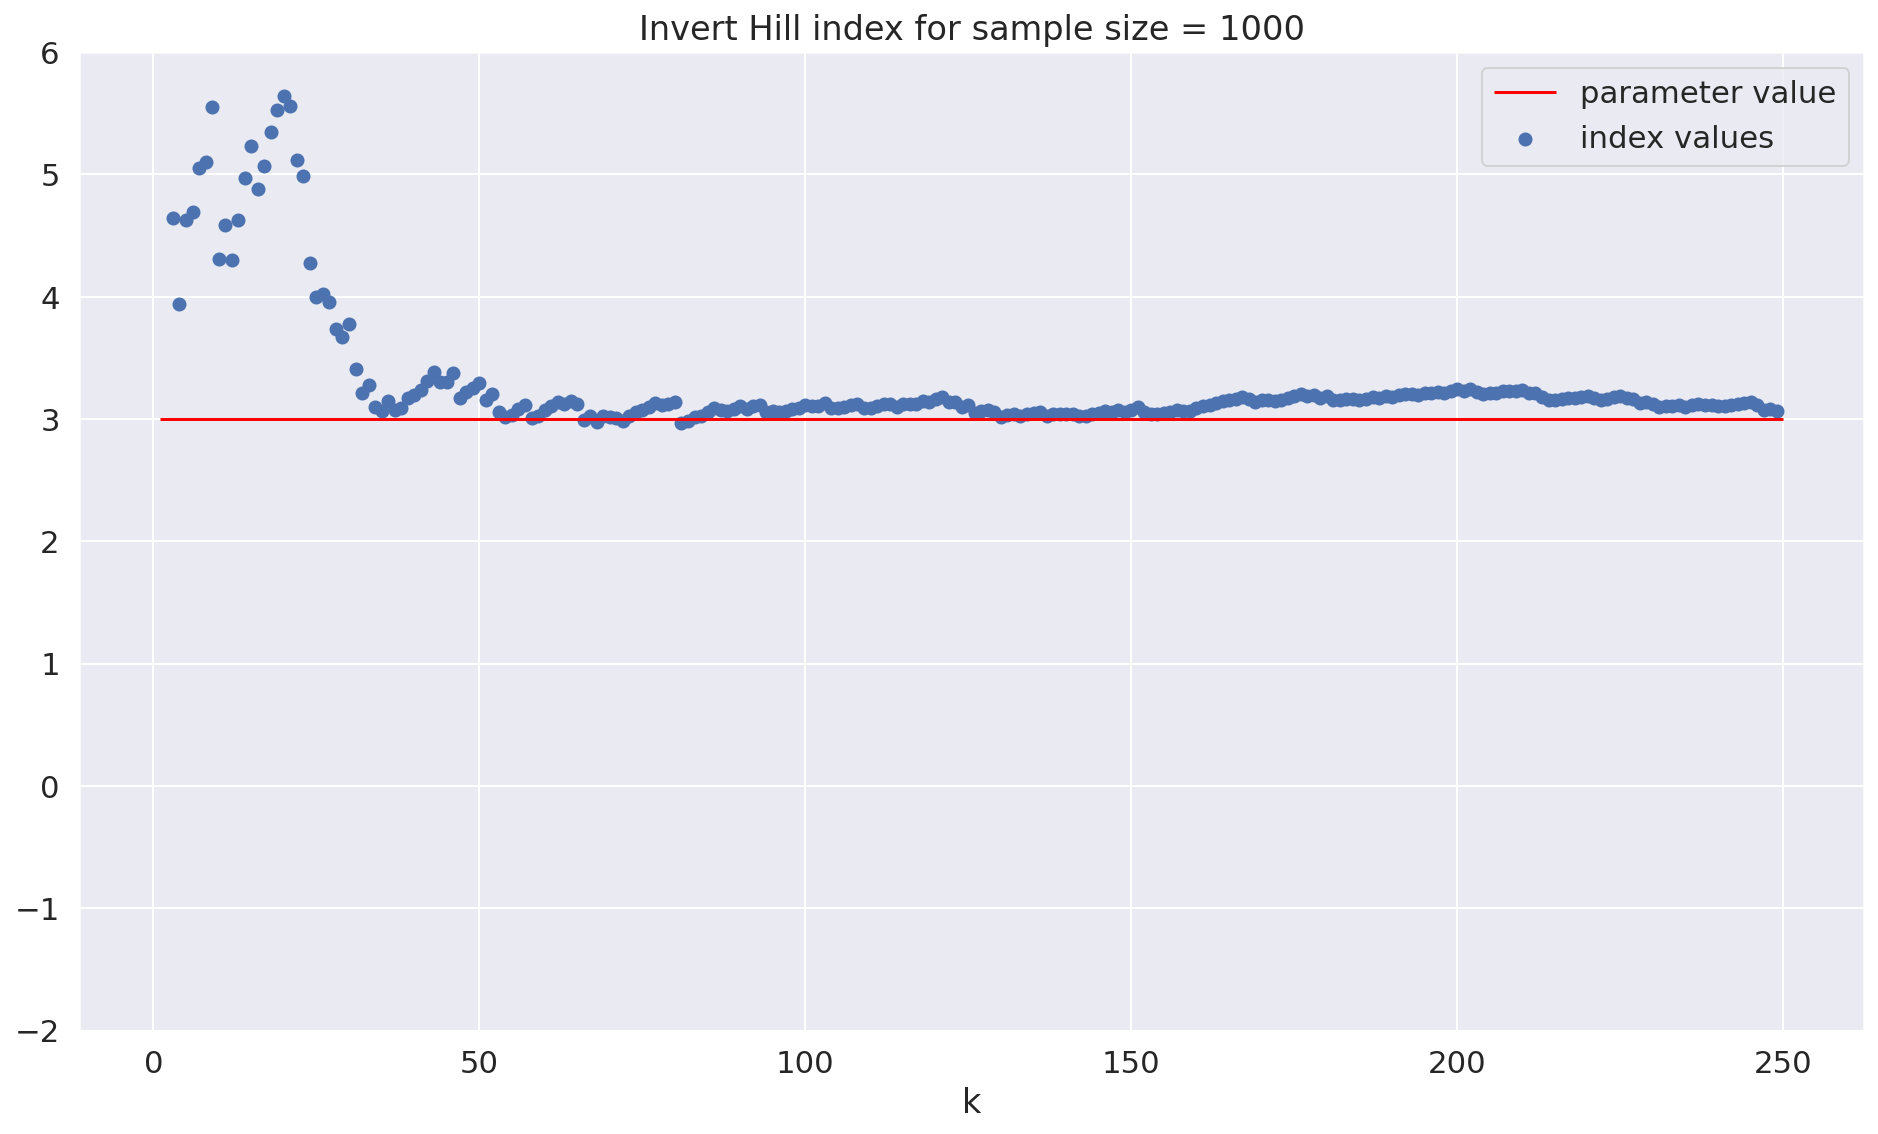

In [6]:
alpha = 3
sample = sps.pareto.rvs(alpha, size  = 1000)
sizes_list = [100, 400, 600, 800, 1000]

for sz in sizes_list:
    draw_Hill_and_Picandas(sample, sz, alpha)

**Замечание:** Как видим, индекс Хилла работает намного лучше. 

In [7]:
data = pd.read_csv('Aids2.csv')
data.head()

,state,sex,diag,death,status,categ,age
0,NSW,M,10905,11081,D,hs,35
1,NSW,M,11029,11096,D,hs,53
2,NSW,M,9551,9983,D,hs,42
3,NSW,M,9577,9654,D,haem,44
4,NSW,M,10015,10290,D,hs,39


Возьмем только тех пациентов, которые умерли.

In [8]:
data = data[data['status'] == 'D']
print(len(data))
dif = np.array(data['death'] - data['diag']) 
dif

1761


array([176,  67, 432, ...,  78,   0, 105])

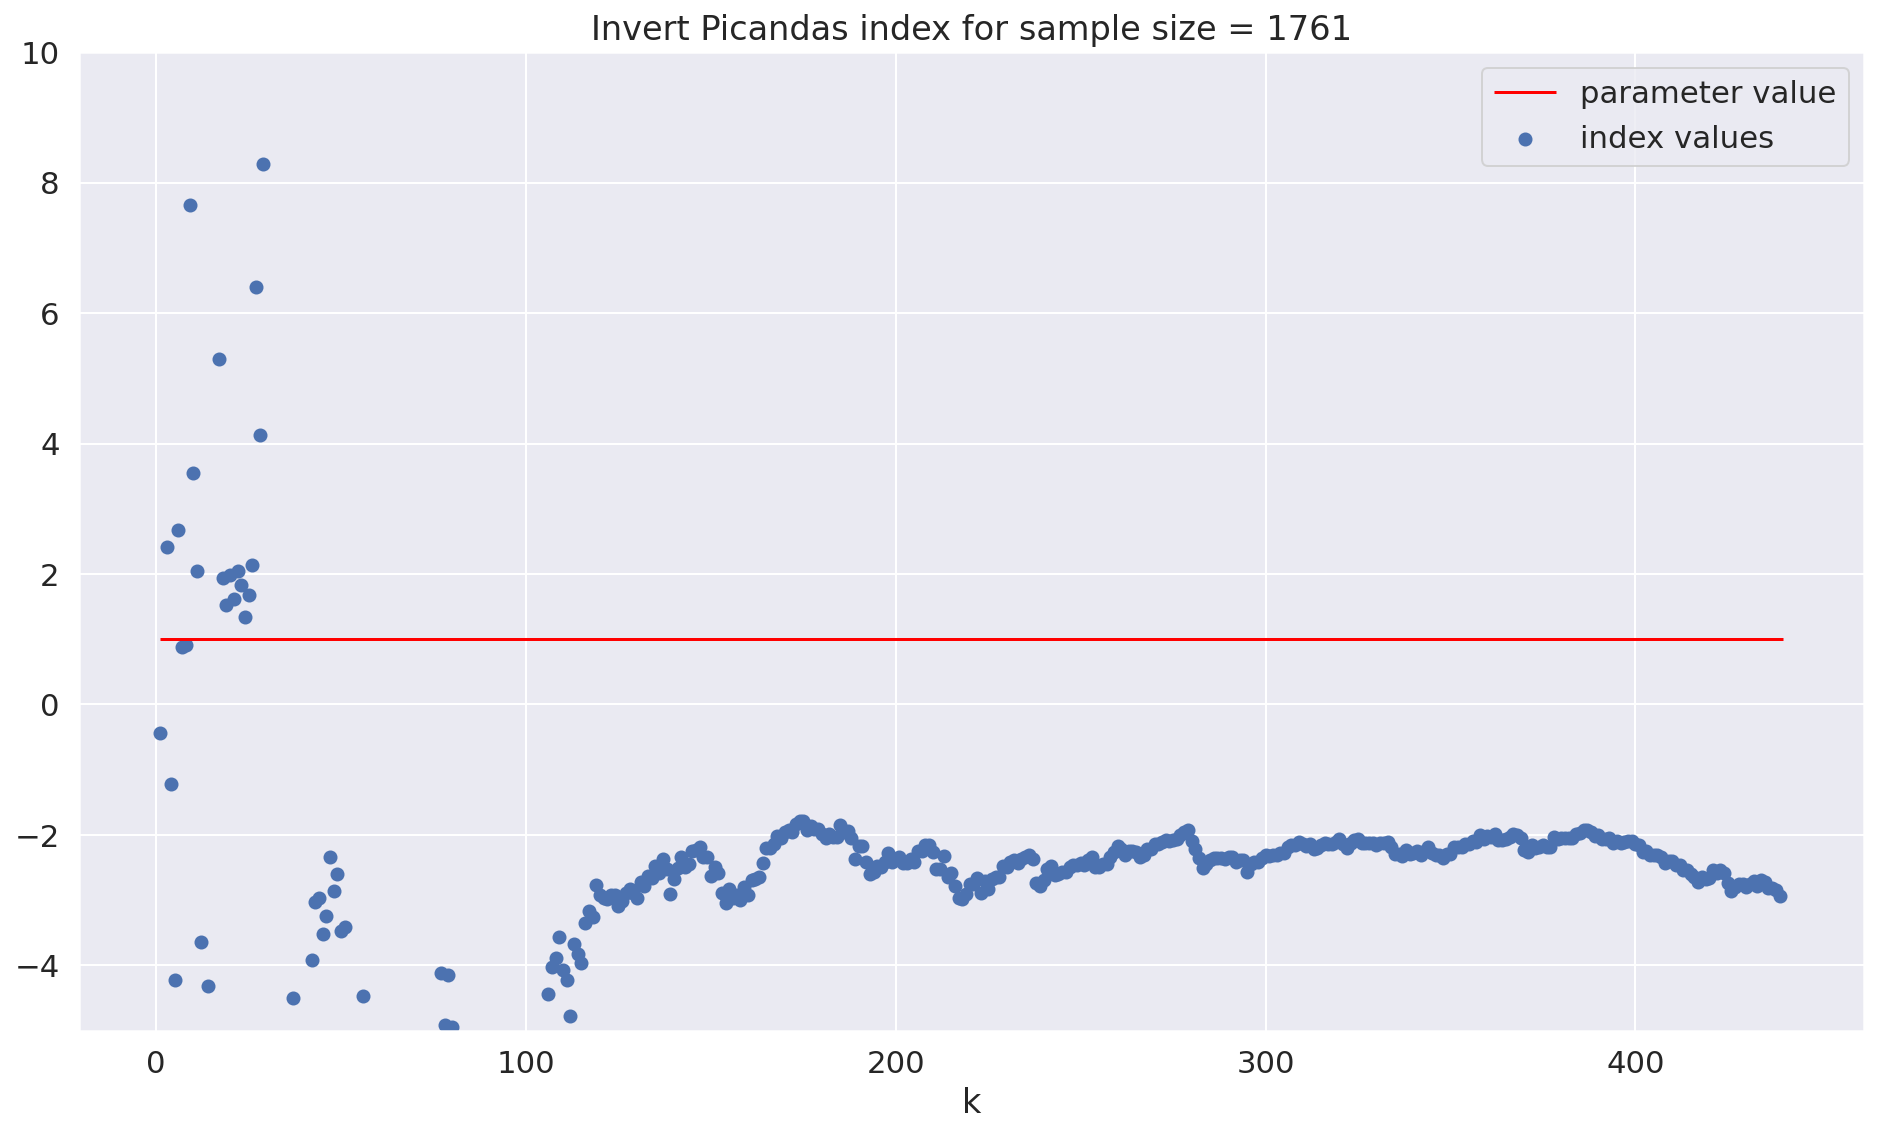

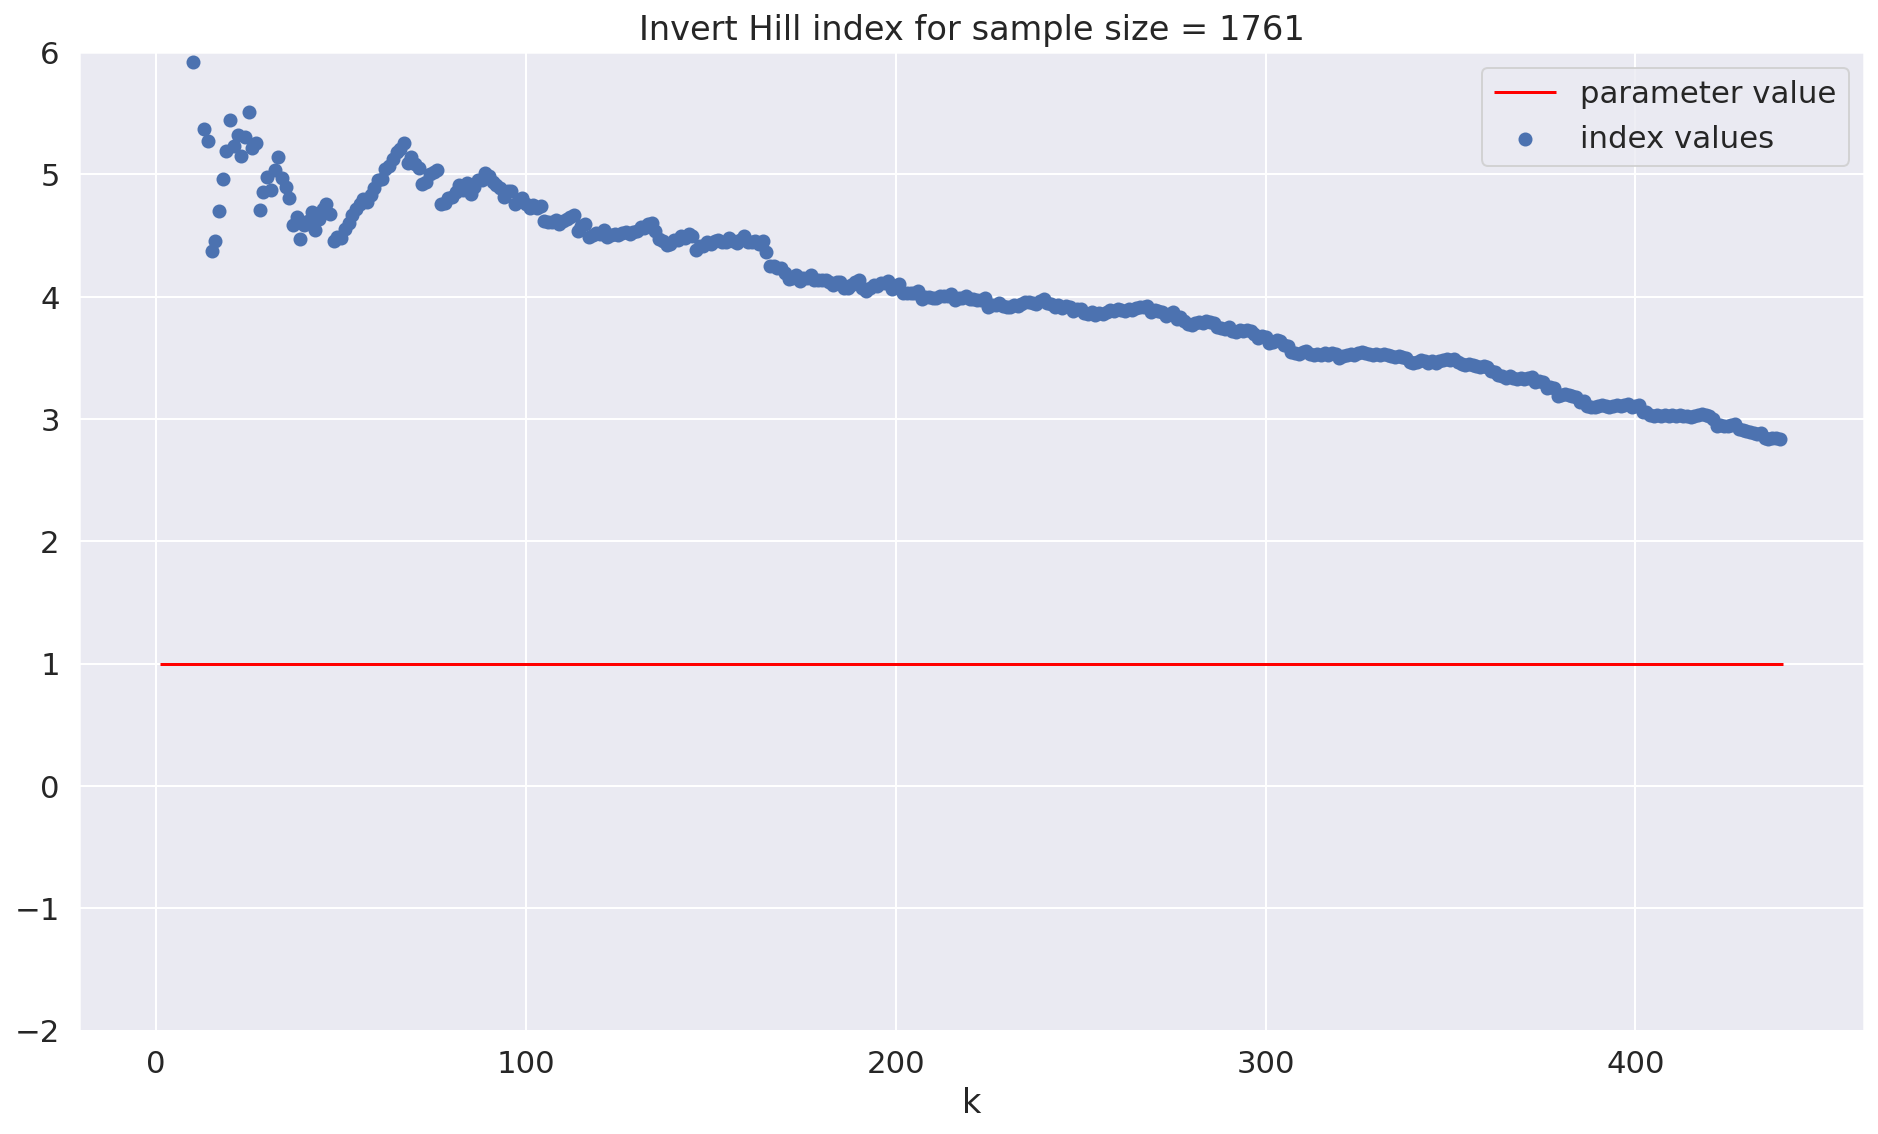

In [9]:
draw_Hill_and_Picandas(dif, len(dif), 1)

Возьмем такое $k = o(n)$ такое что графики стабилизируются. Хорошо подходит $k = 4 * \sqrt n$.

In [15]:
k = int(4 * np.sqrt(len(dif)))
print("Picandas index = ", calc_Picandas(k, dif))
print("Hill index = ", calc_Hill(k, dif))

167
Picandas index =  -0.46847675824030416
Hill index =  0.23519409874170488


**Замечание:** Так как индекс Пикандесса показал отрицательное значение, то это означает, что распределение целевой переменной является распределением с тяжелым хвостом согласно http://www.mathnet.ru/links/ee6a1c785abaf17389d5cab1b43bdfdc/ppi2265.pdf